# Global Power Plant Database 


## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.formula.api import ols
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_gpp= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df_gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Importing the dataset and analyze all the columns 

## Shape of data with number of rows and columns


In [3]:
df_gpp.shape

(907, 27)

There are 907 rows and 27 columns in dataset

We are required to predict 2 labels 'primary_fuel' and 'capacity_mw'. By looking at the values present in the column 'primary_fuel', we see that there are categorical data in that colum. Considering it as our label then it will be a Classification problem.

And if we look at the values present in the column 'capacity_mw', we see that there are continous data in that column so considering it as our label, it will be a Regression problem.

## Key Attributes of the Database

The dataset consists of 27 columns as explained below:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

In [4]:
#checking column names
df_gpp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#checking the datatype information
df_gpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We see that there are many missing values in our dataset.

There are 16 numerical features and 11 discrete(categorical) features.

## Statistical Analysis

In [6]:
df_gpp.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


We can see the columns are having different count which indicates the dataset contains missing values.

## Datatypes of all columns

In [7]:
df_gpp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

country, country_long, name, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source and generation_data_source columns are having object datatype and rest of the columns are having float datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_gpp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

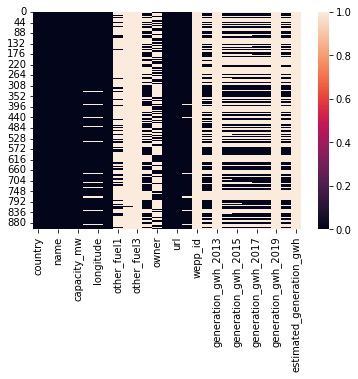

In [9]:
#To check missing values using heatmap
sns.heatmap(df_gpp.isnull())

We can see that there are missing values in many columns and few even have all the 907 rows empty that will need to be removed since it provides no insights.

Only 25-30% of missing value can be allowed in the dataset and greater than that need to be removed. Columns that need to be deleted are:

- other_fuel1
- other_fuel2
- other_fuel3
- owner
- wepp_id
- year_of_capacity_data
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- generation_data_source
- estimated_generation_gwh

In [10]:
#dropping the columns having more than 30% missing values
df_gpp.drop(['other_fuel1',                 
'other_fuel2',                
'other_fuel3',                 
'commissioning_year',          
'owner',
'wepp_id',                     
'year_of_capacity_data',       
'generation_gwh_2013',         
'generation_gwh_2014',         
'generation_gwh_2015',         
'generation_gwh_2016',         
'generation_gwh_2017',
'generation_gwh_2018',
'generation_gwh_2019',
'generation_data_source',      
'estimated_generation_gwh',
'url'],axis=1,inplace=True)

In [11]:
#checking the dimension of the dataset after dropping the columns
df_gpp.shape

(907, 10)

In [12]:
#checking the null values after dropping some columns
df_gpp.isnull().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [13]:
#checking unique values
df_gpp.nunique()

country                 1
country_long            1
name                  907
gppd_idnr             907
capacity_mw           361
latitude              836
longitude             827
primary_fuel            8
source                191
geolocation_source      3
dtype: int64

In [14]:
# getting list of object data type column names
object_datatype = []
for x in df_gpp.dtypes.index:
    if df_gpp.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Datatype Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df_gpp.dtypes.index:
    if df_gpp.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Datatype Columns are: ", float_datatype)

Object Datatype Columns are:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'source', 'geolocation_source']
Float Datatype Columns are:  ['capacity_mw', 'latitude', 'longitude']


In [15]:
# filling missing data for continous values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_gpp['latitude']=imp.fit_transform(df_gpp['latitude'].values.reshape(-1,1))
df_gpp['longitude']=imp.fit_transform(df_gpp['longitude'].values.reshape(-1,1))

# filling missing data for categorical values
df_gpp['geolocation_source']=df_gpp['geolocation_source'].fillna(df_gpp['geolocation_source'].mode()[0])

In [16]:
df_gpp.isnull().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

<AxesSubplot:>

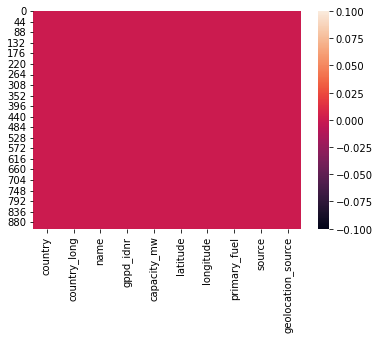

In [17]:
#visualizing the null count with heatmap
sns.heatmap(df_gpp.isnull())

We can see that there is no missing values in the dataset.

In [18]:
df_gpp['gppd_idnr']=df_gpp['gppd_idnr'].str[:3]
df_gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
903,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
904,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI
905,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI


In [19]:
#lets do statistics testing on columns name and source
mod = ols('capacity_mw ~ source', data=df_gpp).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
source,6.014941e+07,190.0,0.887779,0.840475
Residual,2.553206e+08,716.0,NaN,NaN


We are getting p-value greater than 0.05 so we will drop these columns as they have no effect on target column.

# EDA (Exploratory Data Analysis)

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

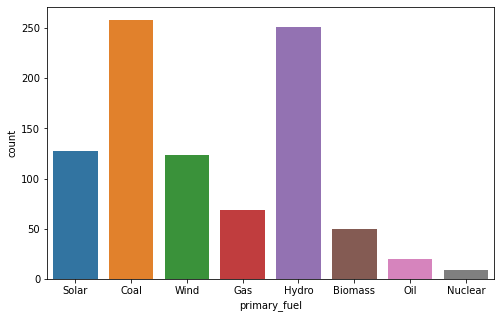

In [20]:
#checking countplot for our target column

plt.figure(figsize=(8,5))
sns.countplot(x='primary_fuel', data=df_gpp)
plt.show()

In the above plot, we can see that the highest number of values have been covered by coal and hydro fuel and, then comes solar and wind. We also see that gas, biomass, oil and nuclear have very low data counts.

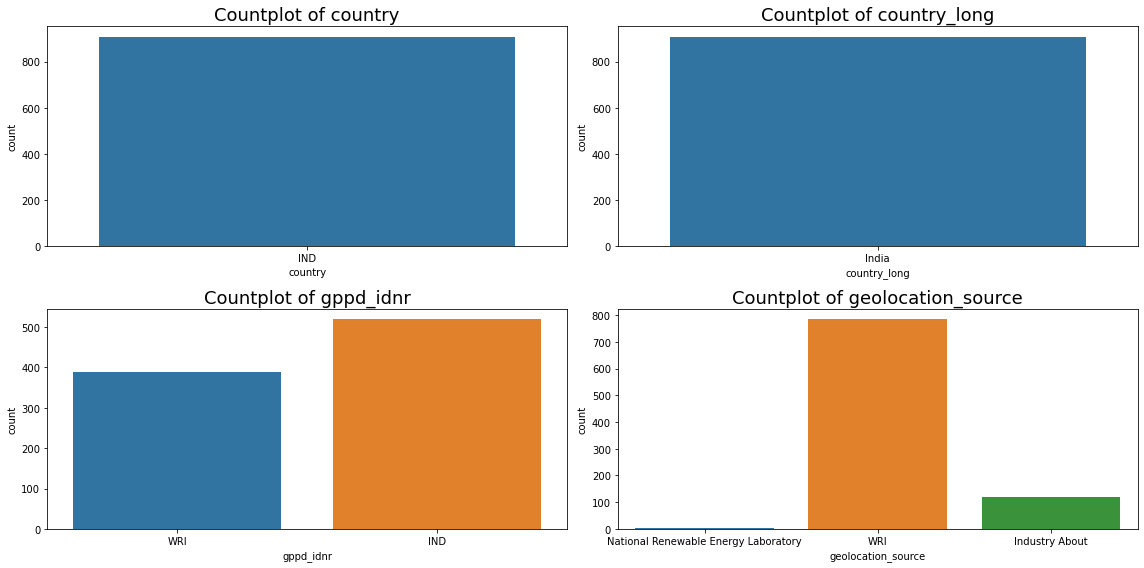

In [21]:
#checking countplot for the feature columns
col=['country','country_long','gppd_idnr','geolocation_source']

plt.figure(figsize=(16,8))
for i in range(0,len(col)):
    plt.subplot(2,2,i+1)
    sns.countplot(df_gpp[col[i]])
    plt.title(f"Countplot of {col[i]}",fontsize=18)
    plt.tight_layout()

- From 'country' and 'country_long' countplots, we can say that there is only one value so we can drop these column.
- From 'gppd_idnr', we see that WRI has Count of 400 and IND has count of 500 i.e., count of IND is greater than WRI.
- From 'geolocation_source', we can see that WRI has almost 800 Count that is highest and National Renewable energy laboratory is very less which is quite negligible, and Industry About has around 100 counts.

Text(0.5, 1.0, 'Distribution of longitude')

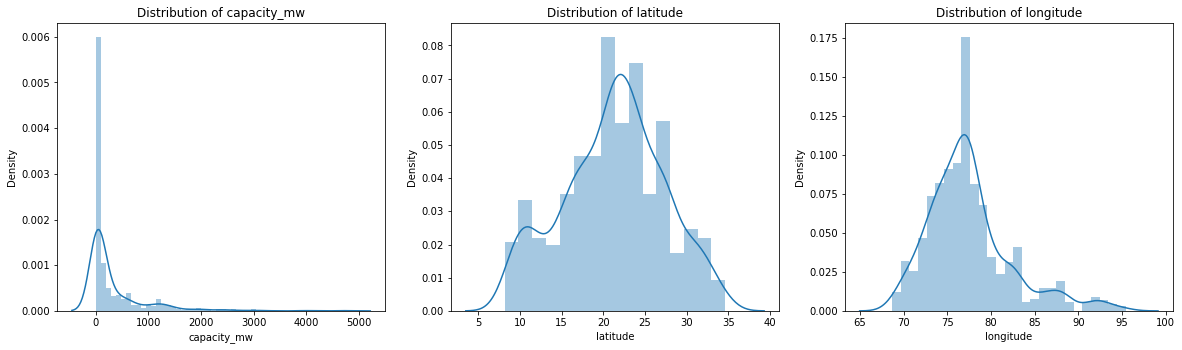

In [22]:
#checking distribution plot for the continuous values columns
plt.figure(figsize=(20,18))
plt.subplot(3,3,1)
sns.distplot(df_gpp['capacity_mw'])
plt.title("Distribution of capacity_mw")
plt.subplot(3,3,2)
sns.distplot(df_gpp['latitude'])
plt.title("Distribution of latitude")
plt.subplot(3,3,3)
sns.distplot(df_gpp['longitude'])
plt.title("Distribution of longitude")

1 From distribution of capacity_mw, we can say it has high left peak

2 From latitude, we see that it is has some data point only in middle so it has middle peak only

3 From distribution of longitude,we see that it has right peak only

All the above distribution plots are not normally distributed, it indicates that data is skewed which will be required to be treated accordingly.

## Bi variate analysis

Bi variate analysis works with two variables.

In [23]:
col1=['country', 'country_long', 'gppd_idnr','capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'geolocation_source']

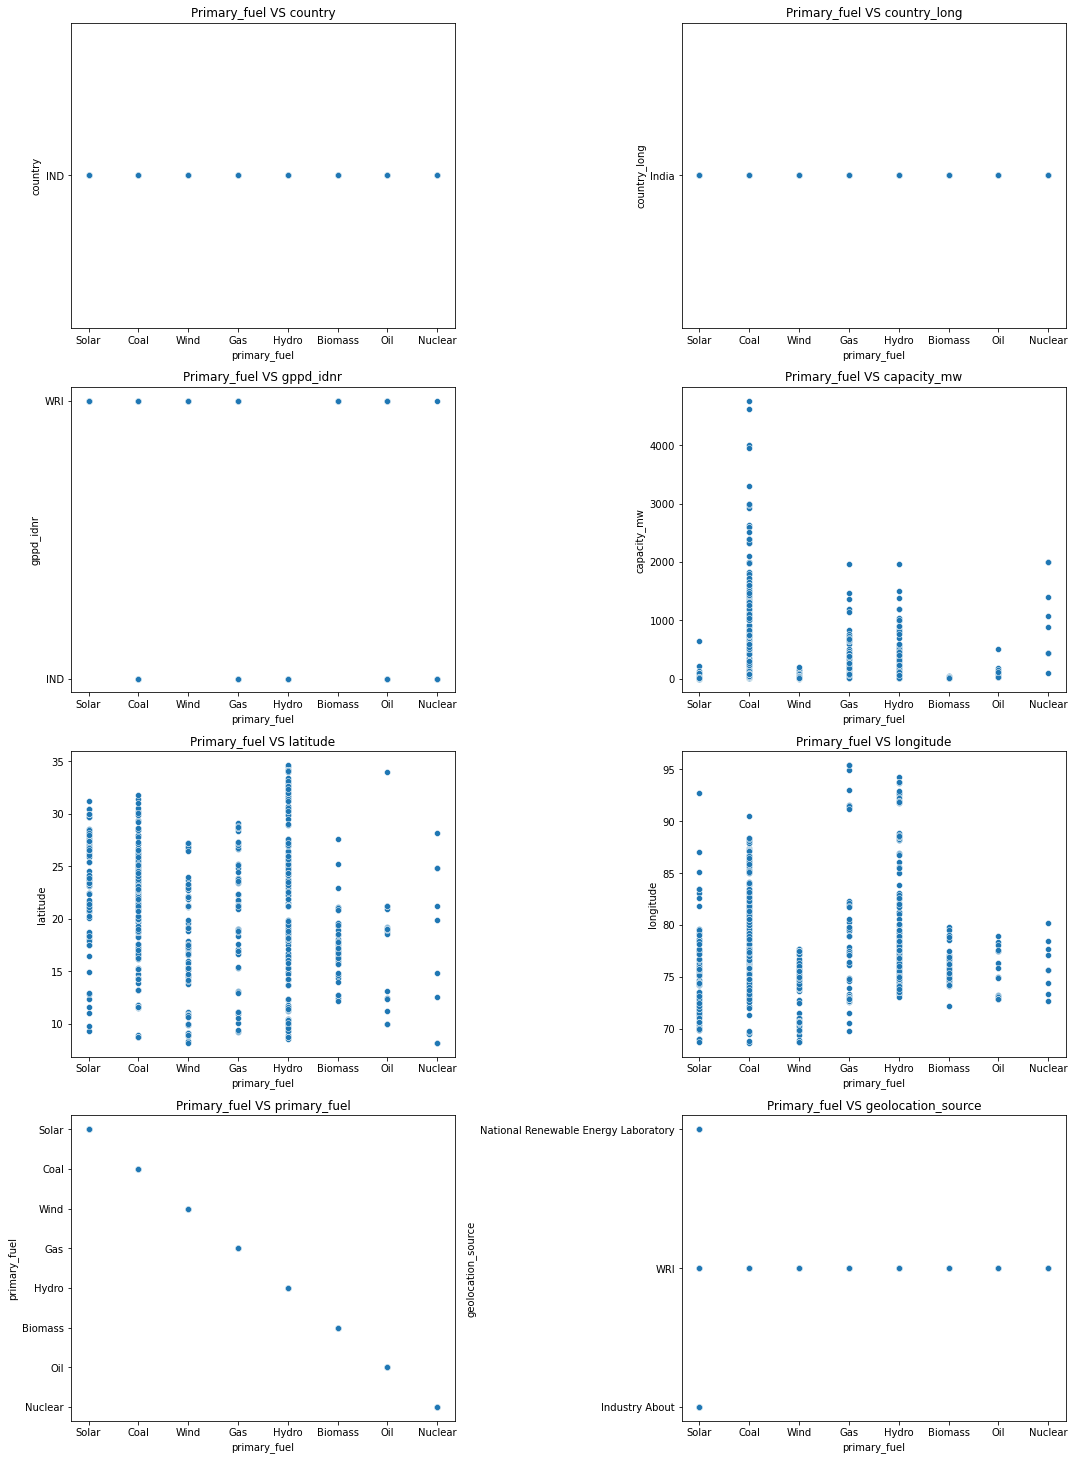

In [24]:
#checking the relationship of primary_fuel with the feature columns using scatterplot
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df_gpp['primary_fuel'],y=df_gpp[col1[i]])
    plt.title(f"Primary_fuel VS {col1[i]}")
    plt.tight_layout()

- From primary_fuel vs latitude plot, we can see that hydro fuel type is distributed across all the latitude values from 0 to 35.
- From primary_fuel vs longitude plot, we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type.
- From the primary_fuel vs capacity_mw plot, we can see that as capacity increases, consumption of coal increases.
- From then remaining plots, we see that they contain only one value so doesn't provide much information.

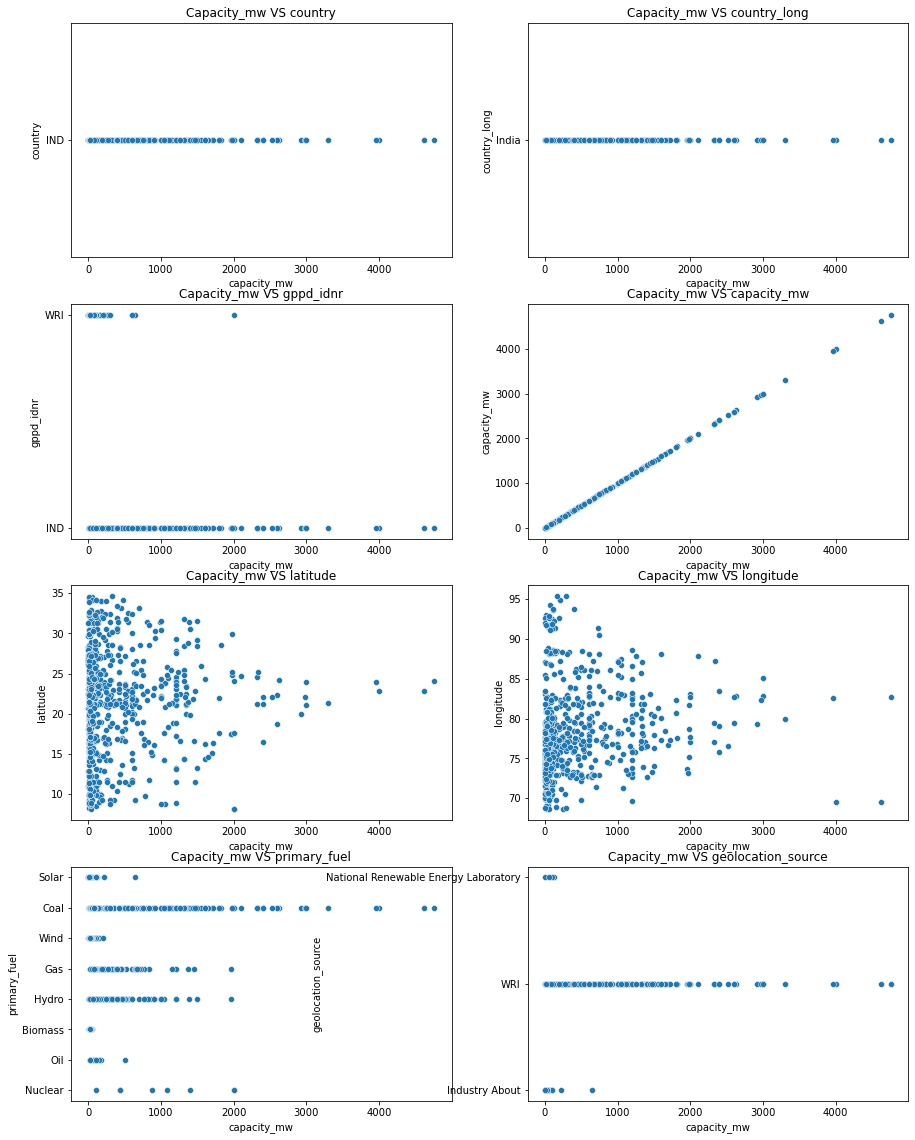

In [25]:
#checking the relationship of capacity_mw with the feature columns using scatterplot
plt.figure(figsize=(15,25))
for i in range(0,len(col1)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df_gpp['capacity_mw'],y=df_gpp[col1[i]])
    plt.title(f"Capacity_mw VS {col1[i]}")

- From gppd_idnr vs capacity_mw plot, we see that as the capacity_mw is increasing the gppd_idnr is also iscreasing mostly for IND.
- From latitude vs capacity_mw plot, we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.
- From longitude vs capacity_mw plot, we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.
- In primary_fuel vs capacity_mw plot, we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.
- From geolocation_source vs capacity_mw plot, we can see that as the capacity_mw is increasing, the value of WRI(Word Resource institute) is only increasing.
- From the remaining plots, we can see that only one value is there so we cannot predict anything.

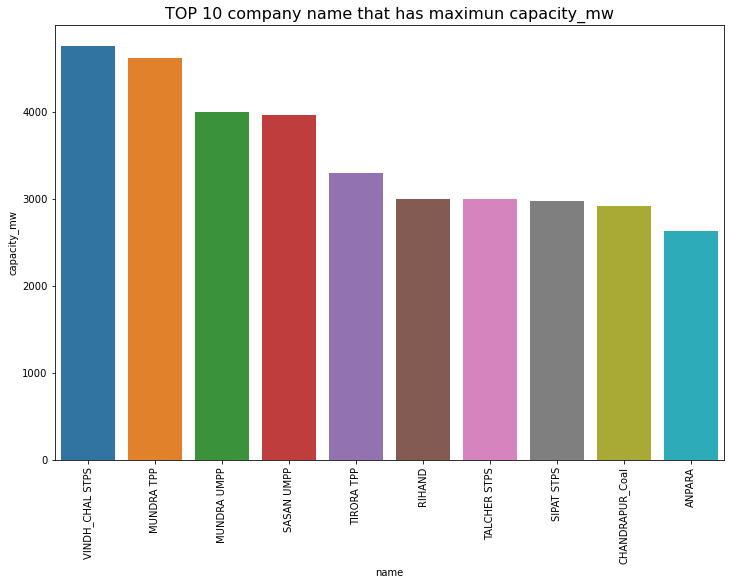

In [26]:
#plotting barplot for capacity_mw vs name
df1_gpp=df_gpp.groupby('name')['capacity_mw'].sum()
df1_gpp=df1_gpp.reset_index()
df1_gpp=df1_gpp.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1_gpp.head(10))
plt.title("TOP 10 company name that has maximun capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

We see that "vindh_chal stps" is the top most company that has the maximun electrical generating capacity.

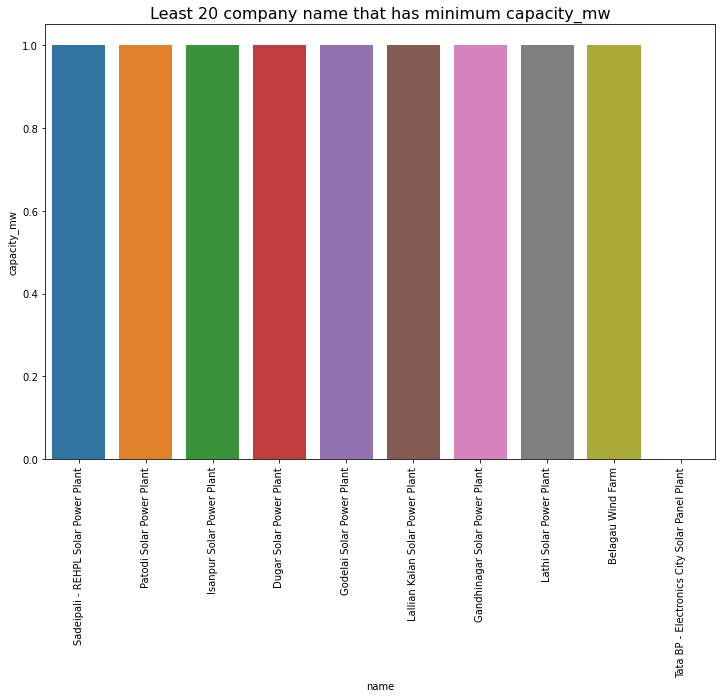

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='name',y='capacity_mw',data=df1_gpp.tail(10))
plt.title("Least 20 company name that has minimum capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

From the plot above we see that all these 10 company produces only 1mw power.

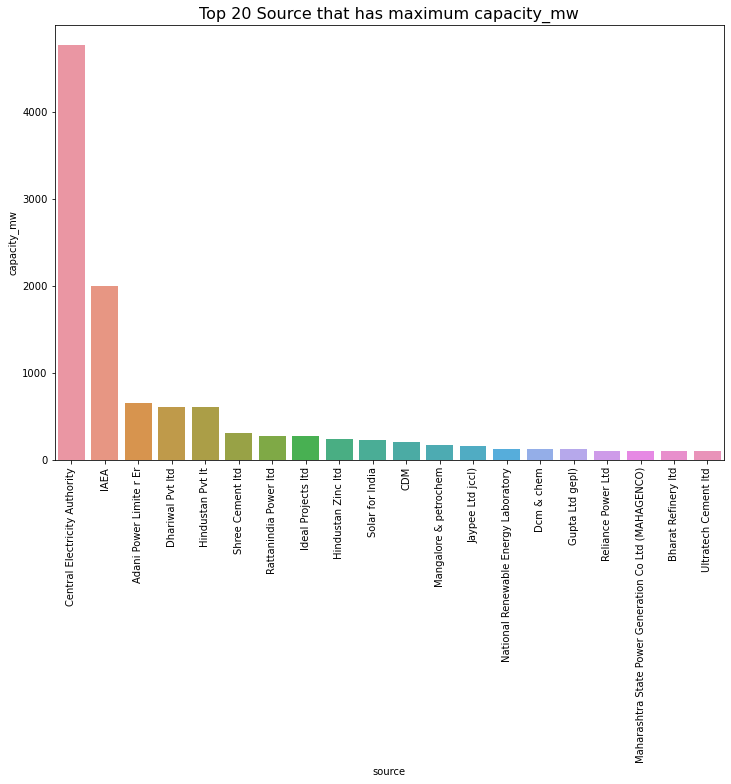

In [28]:
df2_gpp=df_gpp.groupby('source')['capacity_mw'].max()
df2_gpp=df2_gpp.reset_index()
df2_gpp=df2_gpp.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2_gpp.head(20))
plt.title("Top 20 Source that has maximum capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

From the above graph, we see that Central Electricity Authority has the highest electrical generating capacity with more than 4000mw and Ultratech Cement ltd has the lowest value of capacity_mw.

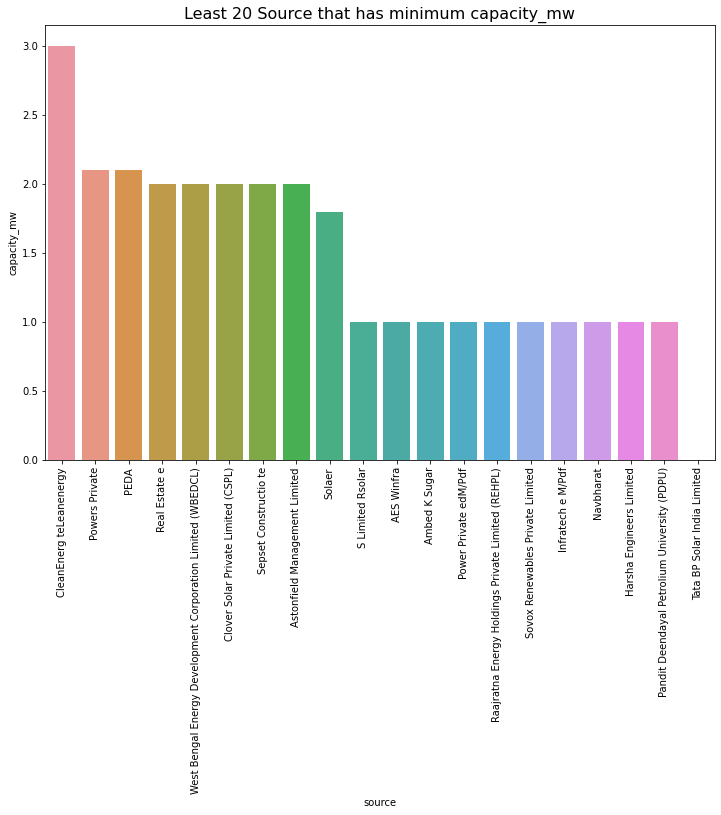

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x='source',y='capacity_mw',data=df2_gpp.tail(20))
plt.title("Least 20 Source that has minimum capacity_mw",fontsize=16)
plt.xticks(rotation=90)
plt.show()

These are the least 20 sources that are having lowest capacity_mw.

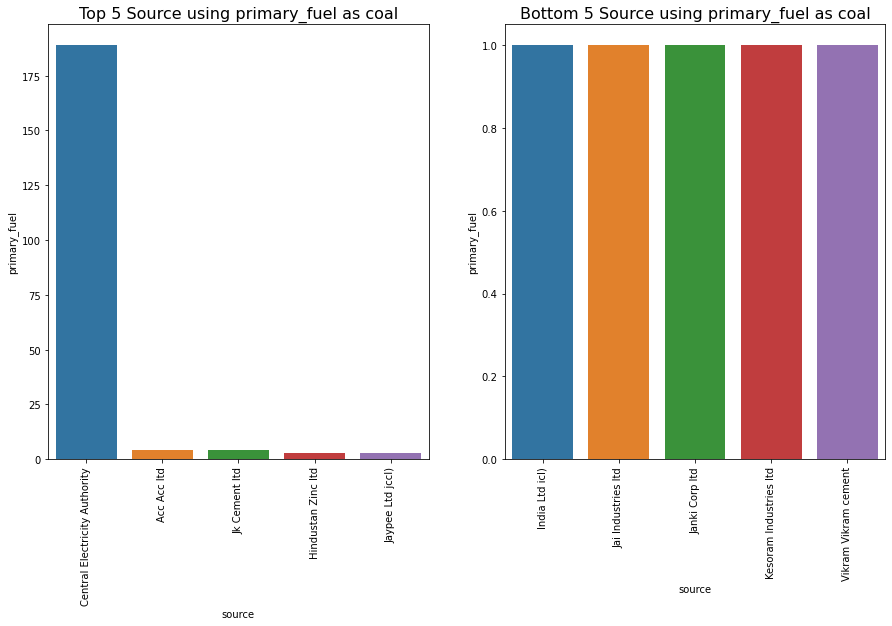

In [30]:
#checking top 5 and bottom 5 source that use coal as primary_fuel
df3_gpp=df_gpp[df_gpp['primary_fuel']=='Coal']
df4_gpp=df3_gpp.groupby('source')['primary_fuel'].count()
df4_gpp=df4_gpp.reset_index()
df4_gpp=df4_gpp.sort_values(by=('primary_fuel'),ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x='source',y='primary_fuel',data=df4_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as coal",fontsize=16)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='source',y='primary_fuel',data=df4_gpp.tail(5))
plt.title("Bottom 5 Source using primary_fuel as coal",fontsize=16)
plt.xticks(rotation=90)
plt.show()

- From top 5 source, we see that Central Electricity Authority use coal at very high level as compared to others.
- From bottom 5 Source, we can see that all of them use coal equally as primary_fuel.

## Feature Engineering:

In [31]:
#using reverse geocoding to extract state and city name from given latitude and longitude
import reverse_geocoder as rg
data_gpp=[]

def reverseGeocode(coordinates):
    result=rg.search(coordinates)
    return (result)
if __name__=="__main__":
    coordinates=list(zip(df_gpp['latitude'],df_gpp['longitude']))
    data1_gpp=reverseGeocode(coordinates)
    data_gpp.append(data1_gpp)

new_df_gpp=pd.DataFrame(data_gpp).transpose()

Loading formatted geocoded file...


In [32]:
df_gpp['state']=new_df_gpp[0].apply(lambda x:x.get('admin1'))

df_gpp['Country']=new_df_gpp[0].apply(lambda x:x.get('cc'))

In [33]:
data_Coal=df_gpp[df_gpp['primary_fuel']=='Coal']
data_Hydro=df_gpp[df_gpp['primary_fuel']=='Hydro']
data_Solar=df_gpp[df_gpp['primary_fuel']=='Solar']
data_Wind=df_gpp[df_gpp['primary_fuel']=='Wind']
data_Gas=df_gpp[df_gpp['primary_fuel']=='Gas']
data_Biomass=df_gpp[df_gpp['primary_fuel']=='Biomass']
data_Oil=df_gpp[df_gpp['primary_fuel']=='Oil']

In [34]:
df5_gpp=data_Coal.groupby('source')['primary_fuel'].count()
df5_gpp=df5_gpp.reset_index()
df5_gpp=df5_gpp.sort_values(by=('primary_fuel'),ascending=False)

df6_gpp=data_Hydro.groupby('source')['primary_fuel'].count()
df6_gpp=df6_gpp.reset_index()
df6_gpp=df6_gpp.sort_values(by=('primary_fuel'),ascending=False)

df7_gpp=data_Solar.groupby('source')['primary_fuel'].count()
df7_gpp=df7_gpp.reset_index()
df7_gpp=df7_gpp.sort_values(by=('primary_fuel'),ascending=False)

df8_gpp=data_Wind.groupby('source')['primary_fuel'].count()
df8_gpp=df8_gpp.reset_index()
df8_gpp=df8_gpp.sort_values(by=('primary_fuel'),ascending=False)

df9_gpp=data_Gas.groupby('source')['primary_fuel'].count()
df9_gpp=df9_gpp.reset_index()
df9_gpp=df9_gpp.sort_values(by=('primary_fuel'),ascending=False)

df10_gpp=data_Biomass.groupby('source')['primary_fuel'].count()
df10_gpp=df10_gpp.reset_index()
df10_gpp=df10_gpp.sort_values(by=('primary_fuel'),ascending=False)

df11_gpp=data_Oil.groupby('source')['primary_fuel'].count()
df11_gpp=df11_gpp.reset_index()
df11_gpp=df11_gpp.sort_values(by=('primary_fuel'),ascending=False)

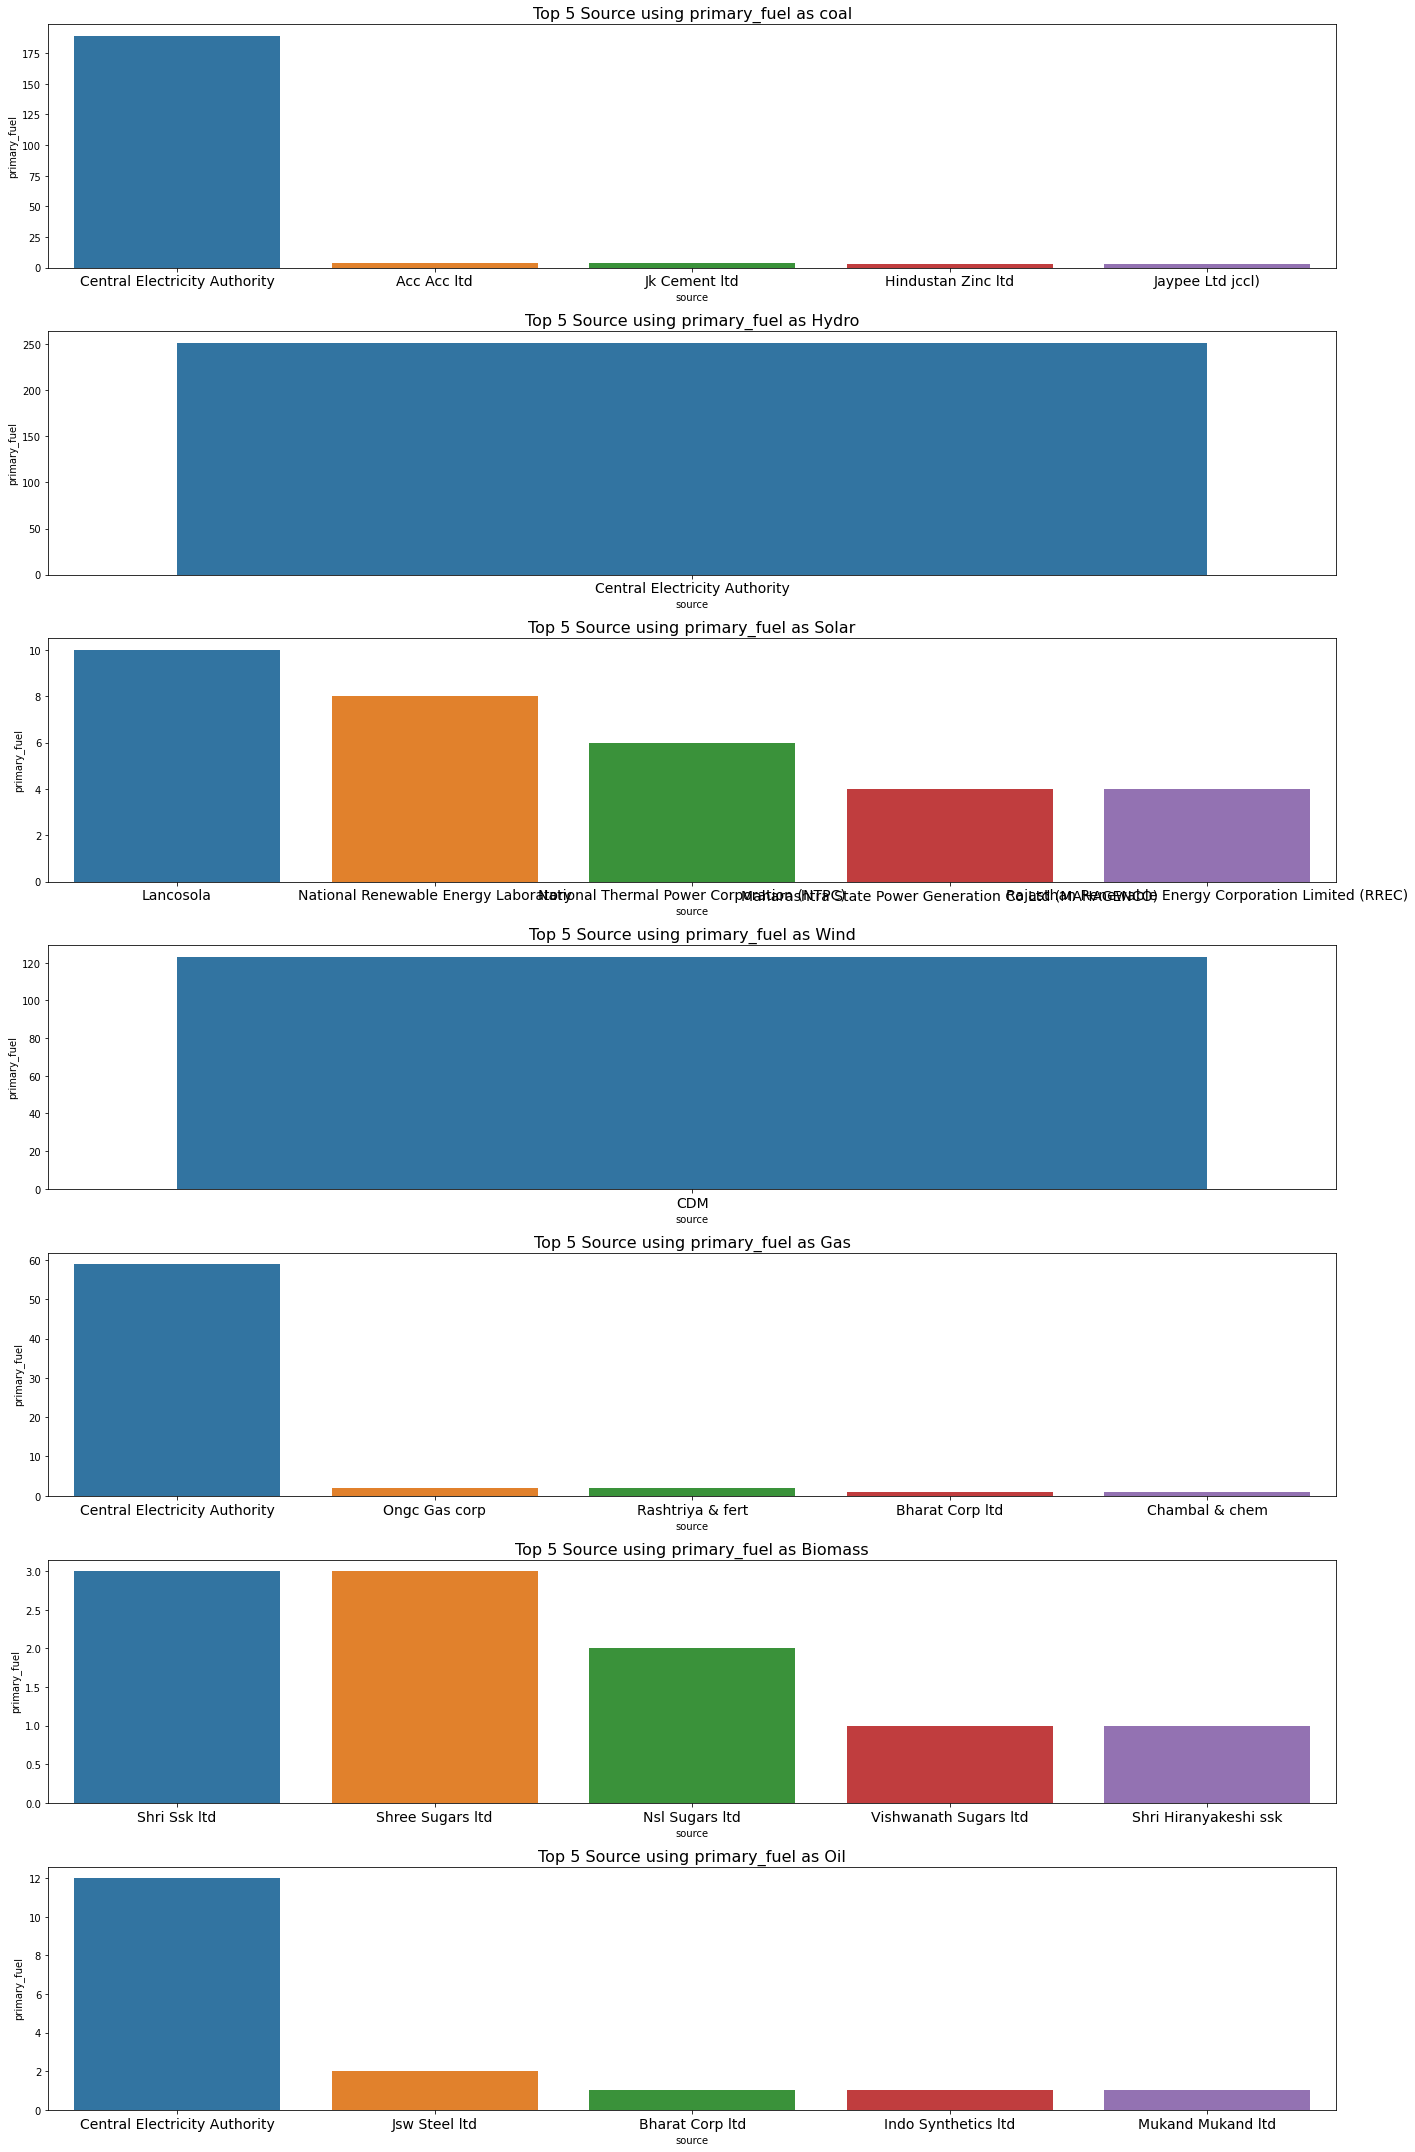

In [35]:
#checking the top 5 source that use different type of fuels using barplot
plt.figure(figsize=(20,30))
plt.subplot(7,1,1)
sns.barplot(x='source',y='primary_fuel',data=df5_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as coal",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,2)
sns.barplot(x='source',y='primary_fuel',data=df6_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Hydro",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,3)
sns.barplot(x='source',y='primary_fuel',data=df7_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Solar",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,4)
sns.barplot(x='source',y='primary_fuel',data=df8_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Wind",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,5)
sns.barplot(x='source',y='primary_fuel',data=df9_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Gas",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,6)
sns.barplot(x='source',y='primary_fuel',data=df10_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Biomass",fontsize=16)
plt.xticks(fontsize=14)
plt.subplot(7,1,7)
sns.barplot(x='source',y='primary_fuel',data=df11_gpp.head(5))
plt.title("Top 5 Source using primary_fuel as Oil",fontsize=16)
plt.xticks(fontsize=14)
plt.tight_layout()

1. Top 5 source using coal as primary fuel are    
- Central Electricity Authority
- Acc Acc ltd
- Jk Cement ltd
- Hindustan Zinc ltd
- Jaypee Ltd jccl

2. Top 5 Source using primary_fuel as Solar are
- Lancosola
- National Renewable Energy Laboratory
- National Thermal Power Corporation (NTPC)
- Maharashtra State Power Generation Co Ltd
- Rajasthan Renewable Energy Corporation Limited

3. Top 5 Source using primary_fuel as Gas are
- Central Electricity Authority
- Ongc Gas corp
- Rashtriya & fert
- Bharat Corp ltd
- Chambal & chem

4. Top 5 Source using primary_fuel as Biomass are
- Shri Ssk ltd
- Shree Sugars ltd
- Nsl Sugars ltd
- Vishwanath Sugars ltd
- Shri Hiranyakeshi ssk

5. Top 5 Source using primary_fuel as Oil are
- Central Electricity Authority
- Jsw Steel ltd
- Bharat Corp ltd
- Indo Synthetics ltd
- Mukand Mukand ltd

<AxesSubplot:ylabel='capacity_mw'>

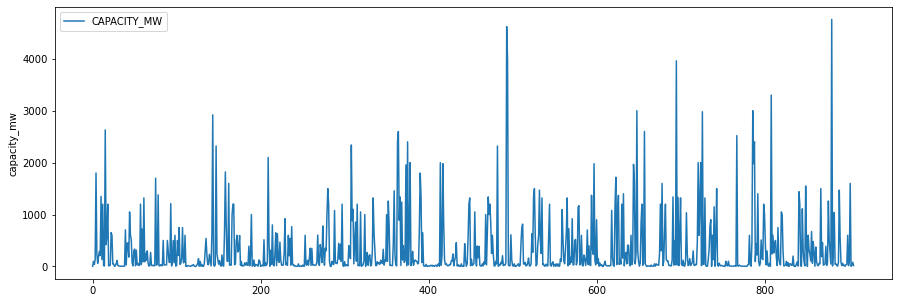

In [36]:
#checking lineplot for capacity_mw
plt.figure(figsize=(15,5))
sns.lineplot(data=df_gpp['capacity_mw'],label='CAPACITY_MW')

We see that the flow in capacity is not increasing continuously with time.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Arunachal Pradesh'),
  Text(1, 0, 'Western Region'),
  Text(2, 0, 'Meghalaya'),
  Text(3, 0, 'Goa'),
  Text(4, 0, 'Manipur'),
  Text(5, 0, 'Nagaland'),
  Text(6, 0, 'Mizoram'),
  Text(7, 0, 'Samchi'),
  Text(8, 0, 'Pondicherry'),
  Text(9, 0, 'Andaman and Nicobar Islands')])

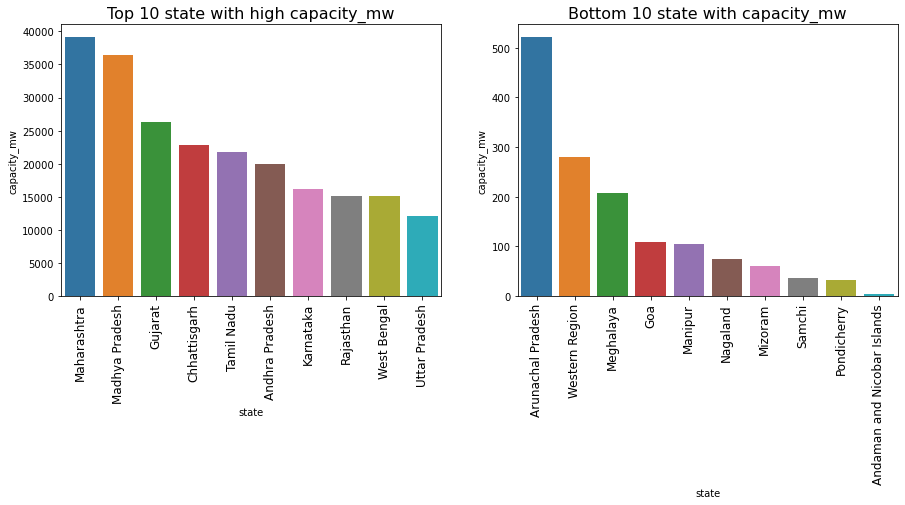

In [37]:
#checking top 10 state having high capacity_mw 
data_state=df_gpp.groupby('state')['capacity_mw'].sum()
data_state=data_state.reset_index()
data_state=data_state.sort_values(by=('capacity_mw'),ascending=False)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='capacity_mw',data=data_state.head(10))
plt.title("Top 10 state with high capacity_mw",fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='state',y='capacity_mw',data=data_state.tail(10))
plt.title("Bottom 10 state with capacity_mw",fontsize=16)
plt.xticks(rotation=90,fontsize=12)

In [38]:
#Checking top 5 state using various kinds of primary_fuel
df12_gpp=data_Coal.groupby('state')['primary_fuel'].count()
df12_gpp=df12_gpp.reset_index()
df12_gpp=df12_gpp.sort_values(by=('primary_fuel'),ascending=False)

df13_gpp=data_Hydro.groupby('state')['primary_fuel'].count()
df13_gpp=df13_gpp.reset_index()
df13_gpp=df13_gpp.sort_values(by=('primary_fuel'),ascending=False)

df14_gpp=data_Solar.groupby('state')['primary_fuel'].count()
df14_gpp=df14_gpp.reset_index()
df14_gpp=df14_gpp.sort_values(by=('primary_fuel'),ascending=False)

df15_gpp=data_Wind.groupby('state')['primary_fuel'].count()
df15_gpp=df15_gpp.reset_index()
df15_gpp=df15_gpp.sort_values(by=('primary_fuel'),ascending=False)

df16_gpp=data_Gas.groupby('state')['primary_fuel'].count()
df16_gpp=df16_gpp.reset_index()
df16_gpp=df16_gpp.sort_values(by=('primary_fuel'),ascending=False)

df17_gpp=data_Biomass.groupby('state')['primary_fuel'].count()
df17_gpp=df17_gpp.reset_index()
df17_gpp=df17_gpp.sort_values(by=('primary_fuel'),ascending=False)

df18_gpp=data_Oil.groupby('state')['primary_fuel'].count()
df18_gpp=df18_gpp.reset_index()
df18_gpp=df18_gpp.sort_values(by=('primary_fuel'),ascending=False)

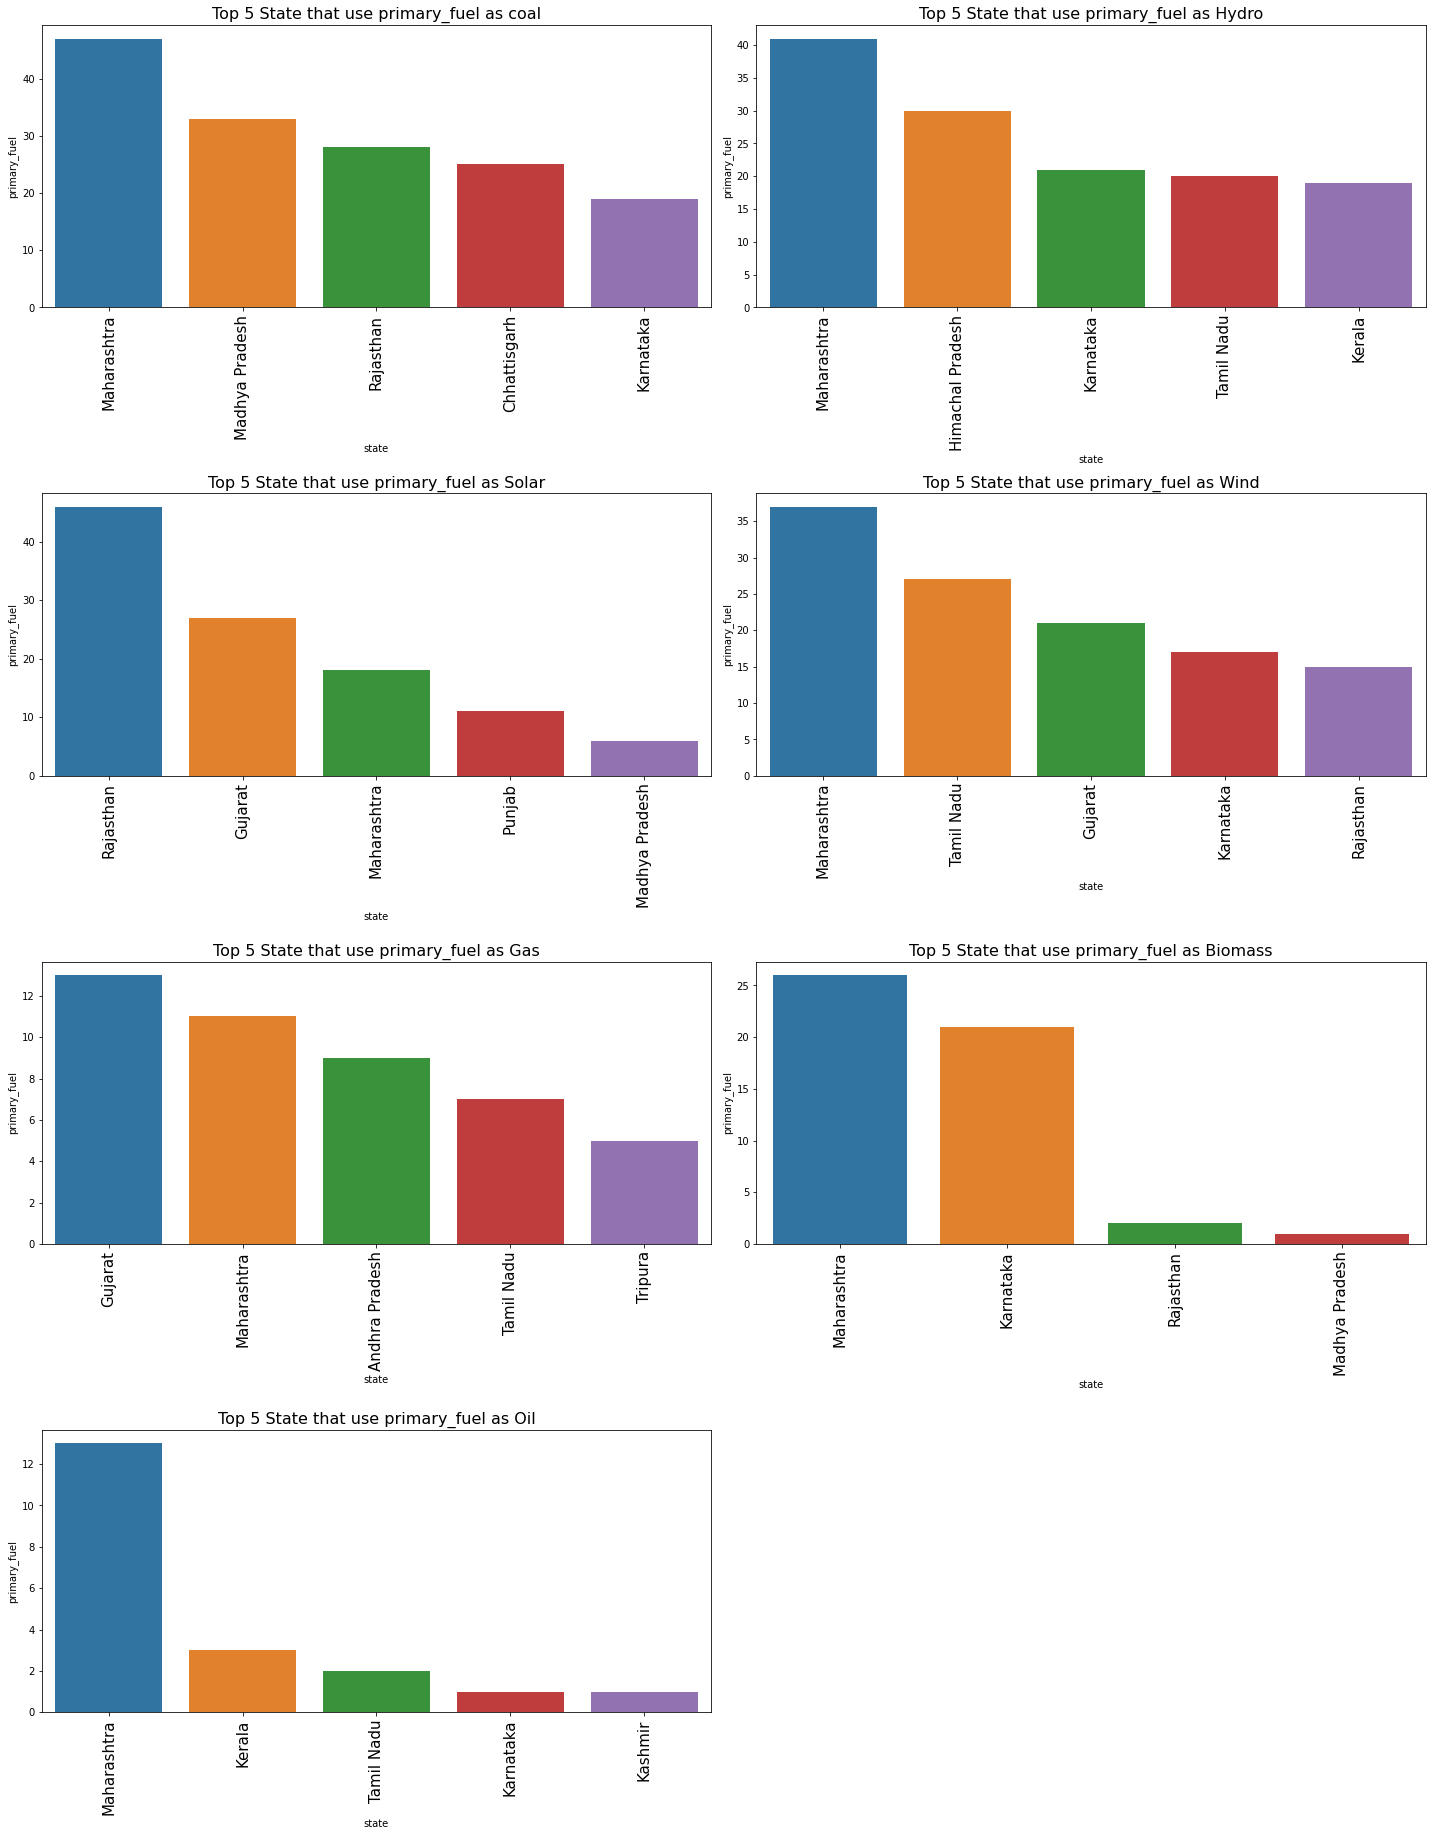

In [39]:
plt.figure(figsize=(20,50))
plt.subplot(8,2,1)
sns.barplot(x='state',y='primary_fuel',data=df12_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as coal",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,2)
sns.barplot(x='state',y='primary_fuel',data=df13_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Hydro",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,3)
sns.barplot(x='state',y='primary_fuel',data=df14_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Solar",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,4)
sns.barplot(x='state',y='primary_fuel',data=df15_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Wind",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,5)
sns.barplot(x='state',y='primary_fuel',data=df16_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Gas",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,6)
sns.barplot(x='state',y='primary_fuel',data=df17_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Biomass",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.subplot(8,2,7)
sns.barplot(x='state',y='primary_fuel',data=df18_gpp.head(5))
plt.title("Top 5 State that use primary_fuel as Oil",fontsize=16)
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()

Let's create a heatmap to visualize the data better.

In [40]:
#checking the country value counts
df_gpp['Country'].value_counts()

IN    905
NP      1
BT      1
Name: Country, dtype: int64

In [41]:
#replacing country names with their full name
df_gpp['Country']=df_gpp['Country'].replace({'IN':'INDIA','GH':'GHANA','NP':'NEPAL','BT':'BHUTAN'})

In [42]:
df_gpp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,state,Country
0,IND,India,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,Rajasthan,INDIA
1,IND,India,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,Rajasthan,INDIA
2,IND,India,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,CDM,WRI,Gujarat,INDIA
3,IND,India,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,Tripura,INDIA
4,IND,India,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,Karnataka,INDIA
903,IND,India,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,Karnataka,INDIA
904,IND,India,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,CDM,WRI,Karnataka,INDIA
905,IND,India,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,Rajasthan,INDIA


In [43]:
#dropping the columns country, country_long, name, source as they dont help much in our model building
df_gpp.drop(['country','country_long','name','source'],axis=1,inplace=True)

In [44]:
df_gpp

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,WRI,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,Rajasthan,INDIA
1,WRI,98.0,24.7663,74.6090,Coal,WRI,Rajasthan,INDIA
2,WRI,39.2,21.9038,69.3732,Wind,WRI,Gujarat,INDIA
3,IND,135.0,23.8712,91.3602,Gas,WRI,Tripura,INDIA
4,IND,1800.0,21.9603,82.4091,Coal,WRI,Chhattisgarh,INDIA
...,...,...,...,...,...,...,...,...
902,IND,1600.0,16.2949,77.3568,Coal,WRI,Karnataka,INDIA
903,WRI,3.0,12.8932,78.1654,Solar,Industry About,Karnataka,INDIA
904,WRI,25.5,15.2758,75.5811,Wind,WRI,Karnataka,INDIA
905,WRI,80.0,24.3500,73.7477,Coal,WRI,Rajasthan,INDIA


## Scaling the data

In [45]:
#using ordinal encoder because most of the columns are having order
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

def ordinal_transform(df_gpp,column):
    df_gpp[column]=oe.fit_transform(df_gpp[column])
    return df_gpp

In [46]:
print(df_gpp['primary_fuel'].unique())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']


In [47]:
print(df_gpp['geolocation_source'].unique())

['National Renewable Energy Laboratory' 'WRI' 'Industry About']


In [48]:
print(df_gpp['state'].unique())

['Rajasthan' 'Gujarat' 'Tripura' 'Chhattisgarh' 'Tamil Nadu'
 'Himachal Pradesh' 'Karnataka' 'Madhya Pradesh' 'Maharashtra' 'Punjab'
 'Uttar Pradesh' 'Andhra Pradesh' 'Kashmir' 'West Bengal' 'Odisha' 'Bihar'
 'Jharkhand' 'Assam' 'Kerala' 'Uttarakhand' 'Sikkim' 'Western Region'
 'Nagaland' 'Haryana' 'Andaman and Nicobar Islands' 'NCT' 'Samchi'
 'Telangana' 'Pondicherry' 'Meghalaya' 'Manipur' 'Arunachal Pradesh' 'Goa'
 'Mizoram']


In [49]:
print(df_gpp['Country'].unique())

['INDIA' 'NEPAL' 'BHUTAN']


In [50]:
print(df_gpp['gppd_idnr'].unique())

['WRI' 'IND']


In [51]:
df_gpp=ordinal_transform(df_gpp,['primary_fuel','geolocation_source','Country','gppd_idnr'])

In [52]:
df_gpp

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country
0,1.0,2.5,28.1839,73.2407,6.0,1.0,Rajasthan,1.0
1,1.0,98.0,24.7663,74.6090,1.0,2.0,Rajasthan,1.0
2,1.0,39.2,21.9038,69.3732,7.0,2.0,Gujarat,1.0
3,0.0,135.0,23.8712,91.3602,2.0,2.0,Tripura,1.0
4,0.0,1800.0,21.9603,82.4091,1.0,2.0,Chhattisgarh,1.0
...,...,...,...,...,...,...,...,...
902,0.0,1600.0,16.2949,77.3568,1.0,2.0,Karnataka,1.0
903,1.0,3.0,12.8932,78.1654,6.0,0.0,Karnataka,1.0
904,1.0,25.5,15.2758,75.5811,7.0,2.0,Karnataka,1.0
905,1.0,80.0,24.3500,73.7477,1.0,2.0,Rajasthan,1.0


In [53]:
#using labelencoder to transform non-numerical state labels to numerical labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_gpp['state']=le.fit_transform(df_gpp['state'])

In [54]:
df_gpp['Capacity_as_per_fuel_type']=df_gpp['capacity_mw']/df_gpp['primary_fuel']#Adding one more feature we can find out the capacity as per the fuel type
df_gpp['Capacity_as_per_fuel_type']=df_gpp['Capacity_as_per_fuel_type'].replace([np.inf,-np.inf],np.nan) #it contains nan and inf value so removing them
df_gpp['Capacity_as_per_fuel_type']=df_gpp['Capacity_as_per_fuel_type'].fillna(0)

In [55]:
print(df_gpp['primary_fuel'].unique())

[6. 1. 7. 2. 3. 0. 5. 4.]


In [56]:
print(df_gpp['geolocation_source'].unique())

[1. 2. 0.]


In [57]:
print(df_gpp['state'].unique())

[24  7 29  5 27  9 11 14 15 23 30  1 12 32 21  4 10  3 13 31 26 33 20  8
  0 19 25 28 22 17 16  2  6 18]


In [58]:
print(df_gpp['Country'].unique())

[1. 2. 0.]


In [59]:
print(df_gpp['gppd_idnr'].unique())

[1. 0.]


## Multivariate Analysis:

In [60]:
#Checking Correlation
df_gpp.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,state,Country,Capacity_as_per_fuel_type
gppd_idnr,1.000000e+00,-0.417896,-0.079234,-0.427398,5.005583e-01,-4.559635e-01,0.035170,-1.253222e-16,-0.368133
capacity_mw,-4.178962e-01,1.000000,0.050984,0.195882,-3.803953e-01,2.048653e-01,-0.053635,9.713949e-03,0.964942
latitude,-7.923391e-02,0.050984,1.000000,0.036362,-1.020447e-02,-1.842751e-01,0.042591,1.100803e-02,0.046770
longitude,-4.273975e-01,0.195882,0.036362,1.000000,-3.479480e-01,2.523426e-01,0.090192,-4.052768e-02,0.203949
primary_fuel,5.005583e-01,-0.380395,-0.010204,-0.347948,1.000000e+00,-4.832168e-01,0.078989,2.152643e-16,-0.394430
geolocation_source,-4.559635e-01,0.204865,-0.184275,0.252343,-4.832168e-01,1.000000e+00,-0.078410,1.913766e-16,0.178149
state,3.516962e-02,-0.053635,0.042591,0.090192,7.898939e-02,-7.841028e-02,1.000000,2.300195e-02,-0.048927
Country,-1.253222e-16,0.009714,0.011008,-0.040528,2.152643e-16,1.913766e-16,0.023002,1.000000e+00,0.003337
Capacity_as_per_fuel_type,-3.681326e-01,0.964942,0.046770,0.203949,-3.944300e-01,1.781493e-01,-0.048927,3.337373e-03,1.000000


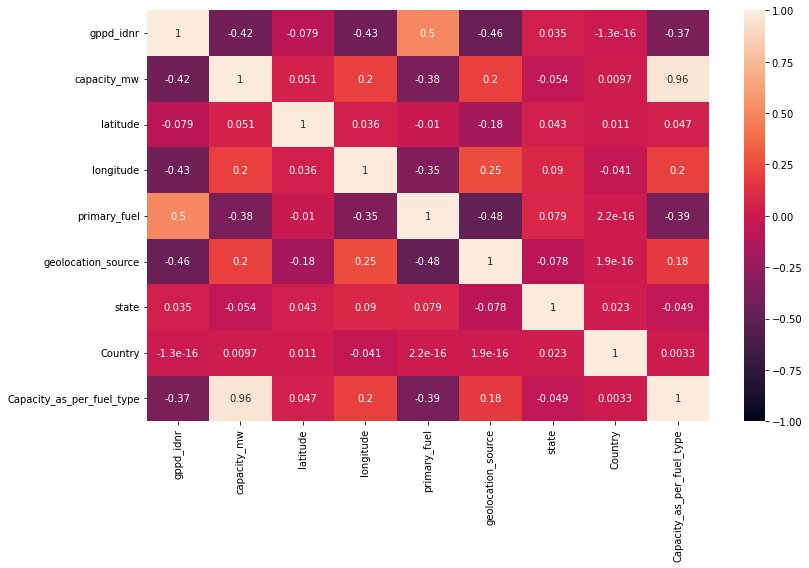

In [61]:
df_correlation = df_gpp.corr()

plt.figure(figsize = (12,8))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True)
plt.tight_layout()

We see that we have some columns that have good positive correlation and some have negative correlation which is good for model building.

## Preparing Data for Regression Model:


In [62]:
x=df_gpp.drop(['capacity_mw'],axis=1)
y=df_gpp['capacity_mw']

In [63]:
x

,gppd_idnr,latitude,longitude,primary_fuel,geolocation_source,state,Country,Capacity_as_per_fuel_type
0,1.0,28.1839,73.2407,6.0,1.0,24,1.0,0.416667
1,1.0,24.7663,74.6090,1.0,2.0,24,1.0,98.000000
2,1.0,21.9038,69.3732,7.0,2.0,7,1.0,5.600000
3,0.0,23.8712,91.3602,2.0,2.0,29,1.0,67.500000
4,0.0,21.9603,82.4091,1.0,2.0,5,1.0,1800.000000
...,...,...,...,...,...,...,...,...
902,0.0,16.2949,77.3568,1.0,2.0,11,1.0,1600.000000
903,1.0,12.8932,78.1654,6.0,0.0,11,1.0,0.500000
904,1.0,15.2758,75.5811,7.0,2.0,11,1.0,3.642857
905,1.0,24.3500,73.7477,1.0,2.0,24,1.0,80.000000


In [64]:
y_new=np.log(y)
y_new=y_new.replace([np.inf,-np.inf],np.nan)
y_new=y_new.fillna(0)

Text(0.5, 1.0, 'After applying log')

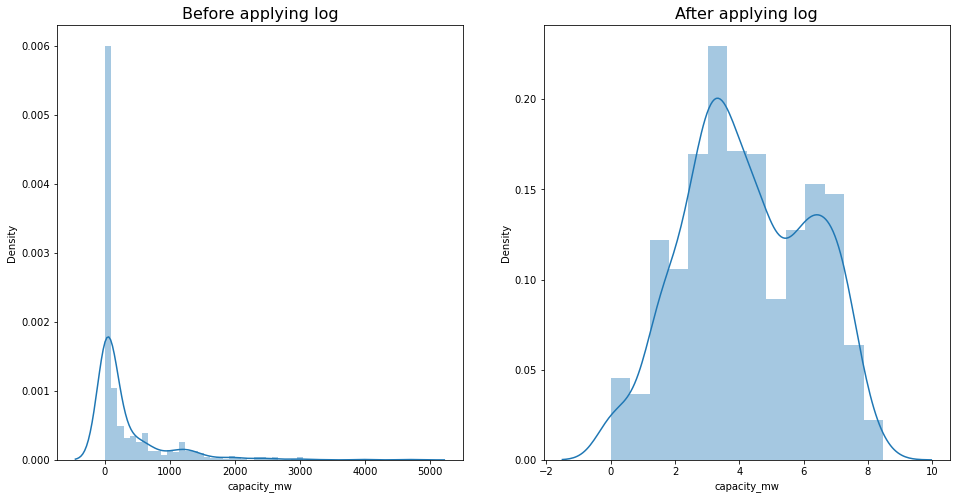

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(y)
plt.title("Before applying log",fontsize=16)
plt.subplot(1,2,2)
sns.distplot(y_new)
plt.title("After applying log",fontsize=16)

The target column 'capacity_mw' is having very large values so we did log transformation and secondly, the target column is also right skewed so according to rule if our target column is right skewed only then we can apply log tansformation on target column. At the time of prediction, we will reverse it though.

## Feature Scaling: 

In [66]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)

## Checking skewness:

In [67]:
x_new.skew()

gppd_idnr                    0.292409
latitude                    -0.149698
longitude                    1.141881
primary_fuel                 0.472251
geolocation_source          -2.159841
state                        0.198231
Country                      0.000000
Capacity_as_per_fuel_type    3.554465
dtype: float64

## Removing skewness:

In [68]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [69]:
#checking skewness after removal
x_new.skew()

gppd_idnr                    2.924091e-01
latitude                     1.336998e-02
longitude                   -3.076170e-02
primary_fuel                 8.966148e-02
geolocation_source          -2.132134e+00
state                       -3.068790e-02
Country                     -6.999318e-07
Capacity_as_per_fuel_type    9.690404e-01
dtype: float64

In [70]:
#we can remove "geolocation_source" and "Country" columns as they are still having skewness after removing the skewness
x=df_gpp.drop(['Country', 'geolocation_source'], axis=1)
x

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,state,Capacity_as_per_fuel_type
0,1.0,2.5,28.1839,73.2407,6.0,24,0.416667
1,1.0,98.0,24.7663,74.6090,1.0,24,98.000000
2,1.0,39.2,21.9038,69.3732,7.0,7,5.600000
3,0.0,135.0,23.8712,91.3602,2.0,29,67.500000
4,0.0,1800.0,21.9603,82.4091,1.0,5,1800.000000
...,...,...,...,...,...,...,...
902,0.0,1600.0,16.2949,77.3568,1.0,11,1600.000000
903,1.0,3.0,12.8932,78.1654,6.0,11,0.500000
904,1.0,25.5,15.2758,75.5811,7.0,11,3.642857
905,1.0,80.0,24.3500,73.7477,1.0,24,80.000000


## Remarks:

Here we have not checked outliers because every column is categorical except for the target column so there is no meaning in checking outliers. Even in longitude and latitude, it is useless to check outliers as it represents address only.

## Training Multiple models:

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [72]:
models_regression={
    "LinearRegression":LinearRegression(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "SupportVectorRegression":SVR()
}

## Finding best Random State

In [73]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    lr_= LinearRegression()
    lr_.fit(x_train, y_train)
    pred_lr = lr_.predict(x_test)
    acc=r2_score(y_test, pred_lr)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.8923408558303447 on Random_state  98


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=98)

## Finding the best model:

--------------------- LinearRegression ---------------------
Score 0.8923408558303447
MEAN_SQUARE_ERROR 70300.58563946055
MEAN_ABSOLUTE_ERROR 148.94931346465455
RMSE 265.14257605948643
R2_SCORE 0.8923408558303447


MODEL PERFORMANCE CURVE


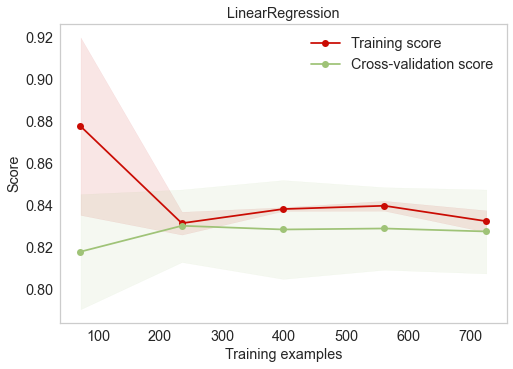

--------------------- GradientBoostingRegressor ---------------------
Score 0.9964900162087047
MEAN_SQUARE_ERROR 1794.3754848511426
MEAN_ABSOLUTE_ERROR 17.606645763906833
RMSE 42.36006946230309
R2_SCORE 0.9964900162087047


MODEL PERFORMANCE CURVE


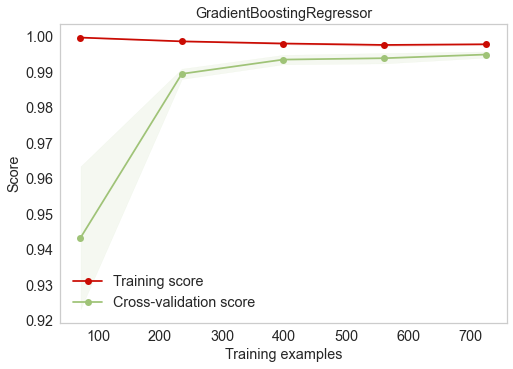

--------------------- RandomForestRegressor ---------------------
Score 0.9970048748159828
MEAN_SQUARE_ERROR 1705.0586857695534
MEAN_ABSOLUTE_ERROR 12.363736294757093
RMSE 41.29235626323053
R2_SCORE 0.9970048748159828


MODEL PERFORMANCE CURVE


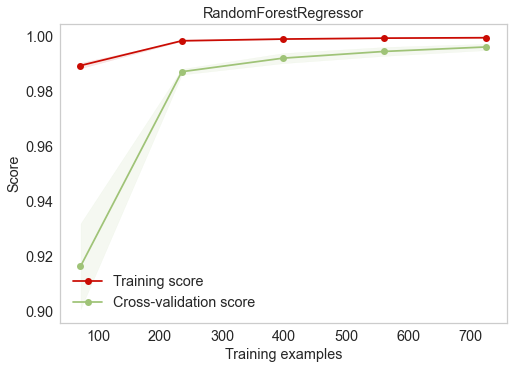

--------------------- DecisionTreeRegressor ---------------------
Score 0.9968996622902081
MEAN_SQUARE_ERROR 2109.4689381098865
MEAN_ABSOLUTE_ERROR 12.39580219780224
RMSE 45.928955334406275
R2_SCORE 0.9968996622902081


MODEL PERFORMANCE CURVE


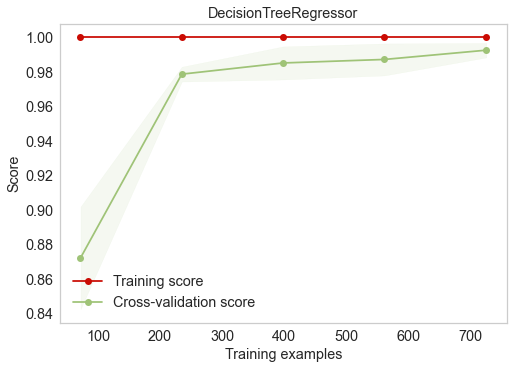

--------------------- SupportVectorRegression ---------------------
Score 0.9188403152749214
MEAN_SQUARE_ERROR 79409.93468206895
MEAN_ABSOLUTE_ERROR 115.00548237538543
RMSE 281.79768395440897
R2_SCORE 0.9188403152749214


MODEL PERFORMANCE CURVE


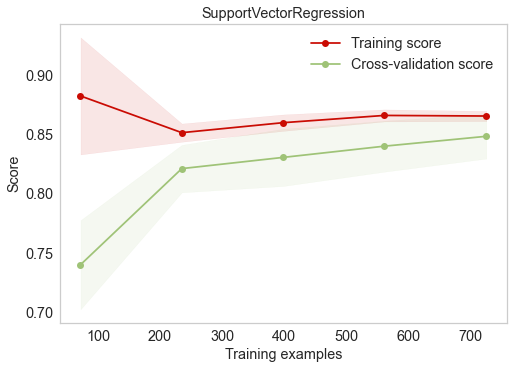

In [75]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
Rmse=[]
for name,model in models_regression.items():
    print("---------------------",name,"---------------------")
    Model.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cs=cross_val_score(model,x_new,y_new,cv=5,scoring='r2').mean()
    cvs.append(cs*100)
    mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
    Mse.append(mse)
    sc=model.score(x_test,y_test)
    score.append(sc)
    print("Score",sc)
    print("MEAN_SQUARE_ERROR",mse)
    mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
    Mae.append(mae)
    print("MEAN_ABSOLUTE_ERROR",mae)
    rmse=np.sqrt(mse)
    Rmse.append(rmse)
    print("RMSE",rmse)
    print("R2_SCORE",r2_score(y_test,y_pred))
    print("\n")
    print("MODEL PERFORMANCE CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
    plt.show()
    

In [76]:
#making a dataframe of the models
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':Rmse
})

models_csv

,models,Score,Cross_val_score,Msa,Mae,RMSE
0,LinearRegression,0.892341,82.737604,70300.585639,148.949313,265.142576
1,GradientBoostingRegressor,0.996490,99.521121,1794.375485,17.606646,42.360069
2,RandomForestRegressor,0.997005,99.592131,1705.058686,12.363736,41.292356
3,DecisionTreeRegressor,0.996900,99.324196,2109.468938,12.395802,45.928955
4,SupportVectorRegression,0.918840,84.833588,79409.934682,115.005482,281.797684


## We are selecting Random Forest Regressor as our final model since it has less Mae value and less RMSE.

## Hyper parameter tuning on the best ML Model:

In [77]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
param_class={
 'bootstrap': [True,False],
 'criterion': ['squared_error','absolute_error', 'poisson'],
 'max_depth': [None,1,2,3],
 'max_features': ['sqrt','log2', None],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]}

In [81]:
#using the Grid Search CV method for hyper parameter tuning the best model.
grid=GridSearchCV(estimator=rfr,param_grid=param_class,n_jobs=-1,cv=5)

In [82]:
#training the Grid Search CV with the list of parameters it should check for best possible outcomes.
grid.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

In [83]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [84]:
grid.best_score_

0.9960298634022273

## Final Model Learning Curve:

In [85]:
rfrr=RandomForestRegressor(
 bootstrap=True,
 criterion= 'squared_error',
 max_depth= None,
 max_features= None,
 max_samples= None,
 min_samples_leaf= 1,
 min_samples_split= 3)

<AxesSubplot:title={'center':'Final Model Learnig Curve'}, xlabel='Training examples', ylabel='Score'>

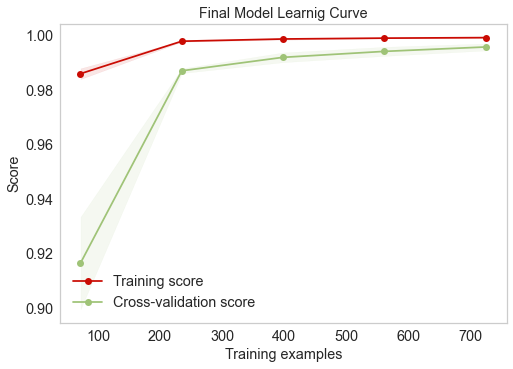

In [86]:
skplt.estimators.plot_learning_curve(rfrr,x_new,y_new,cv=5,scoring='r2',text_fontsize='large',title='Final Model Learnig Curve')

## Final model metrics:

In [87]:
rfrr.fit(x_train,y_train)
pred_rfrr=rfrr.predict(x_test)

print("Mean squared error",mean_squared_error(y_test,pred_rfrr))
print("Mean absolute error",mean_absolute_error(y_test,pred_rfrr))
print("R2 Score",r2_score(y_test,pred_rfrr))
print("Model score",rfrr.score(x_test,y_test))

Mean squared error 0.012739841973566798
Mean absolute error 0.052127563756404684
R2 Score 0.9969168613757753
Model score 0.9969168613757753


## The R2 score of Final Regression model is 99.69%.

## Saving and loading the model:

In [88]:
import joblib
joblib.dump(grid,"Final_model_Regression_GPP.obj")
model=joblib.load('Final_model_Regression_GPP.obj')

In [89]:
pred=model.predict(x_test)
np.exp(pred)

array([6.00199204e+02, 1.31564698e+02, 1.01594042e+01, 2.95422586e+02,
       2.24533681e+02, 2.48040932e+01, 8.06724715e+00, 1.04921057e+03,
       9.04316115e+00, 7.03809889e+01, 2.50395018e+01, 1.00000000e+00,
       2.49478542e+01, 1.81361745e+01, 1.69445629e+02, 3.31681063e+02,
       5.00384953e+02, 1.47509022e+03, 1.20000000e+03, 5.00000000e+00,
       2.86636744e+02, 1.00000000e+00, 1.00088050e+03, 3.21227154e+03,
       1.05538494e+01, 2.33845347e+03, 3.51296706e+02, 1.50038424e+03,
       2.11863752e+01, 1.57425309e+02, 7.12319945e+01, 5.00000000e+00,
       2.55760812e+03, 3.36503308e+01, 1.00405278e+02, 3.00295837e+01,
       1.07296995e+01, 1.07479731e+02, 5.43628373e+02, 4.02450747e+01,
       6.58539597e+02, 1.09128295e+02, 5.00000000e+02, 2.09216964e+00,
       5.00000000e+00, 1.00157450e+03, 2.40247243e+01, 5.00000000e+00,
       1.23325777e+02, 1.34776297e+03, 8.33199218e+01, 6.51407594e+02,
       3.21182838e+01, 4.28913111e+02, 1.02825935e+01, 1.19958745e+02,
      

## Preparing Data for Classification Model:

In [90]:
x=df_gpp.drop(['primary_fuel'],axis=1)
y=df_gpp['primary_fuel']

## Checking outliers:

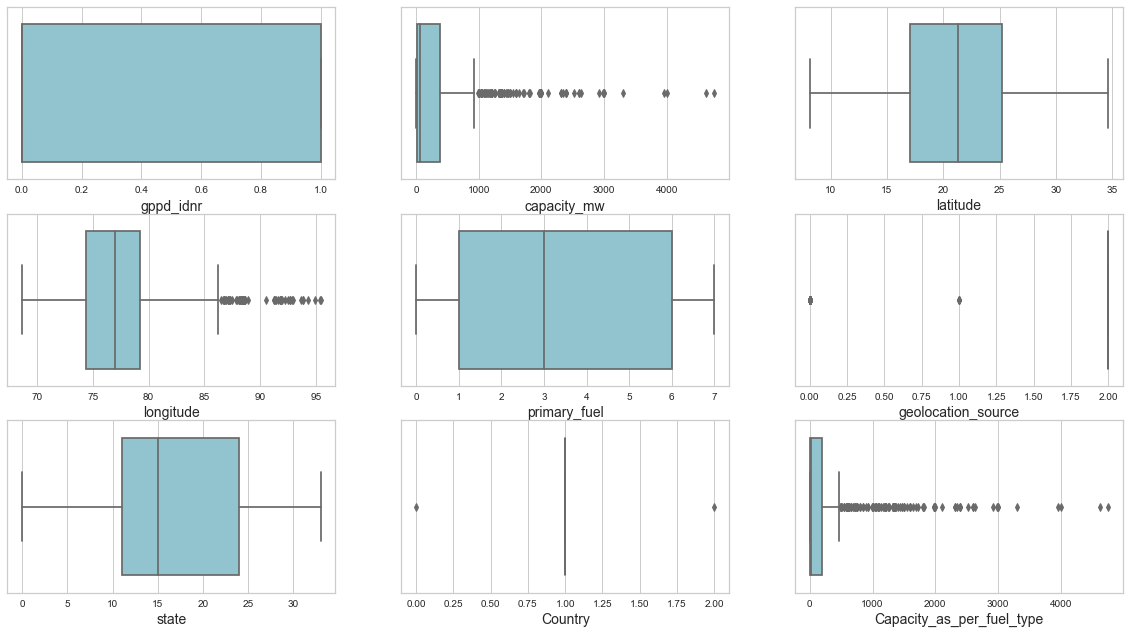

In [91]:
plt.figure(figsize = (20,45))
plot_number = 1

for i in df_gpp:
    if plot_number <= 11: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(df_gpp[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

We see that there are outliers present in some columns.

## Remove outliers:

### Outlier removal using Zscore


In [92]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy

from scipy.stats import zscore

z_score= zscore(df_gpp) #Put continuous/float input variable in z-score 

abs_z_score = np.abs(z_score)

data = (abs_z_score < 3).all(axis = 1)

new_df_gpp = df_gpp[data]

print("shape before :", df_gpp.shape)
print("shape after :", new_df_gpp.shape)
print("Percentage Loss :", (df_gpp.shape[0]-new_df_gpp.shape[0])/df_gpp.shape[0])

shape before : (907, 9)
shape after : (864, 9)
Percentage Loss : 0.047409040793825796


4.741% data loss after using zscore technique

95.259% data remains

## Resolving the class imbalance issue in the target column using SMOTE method:

In [93]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=98)
x_res,y_res=smote.fit_resample(x,y)
x_new=pd.DataFrame(x_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['primary_fuel'])

Text(0.5, 1.0, 'Balanced Data')

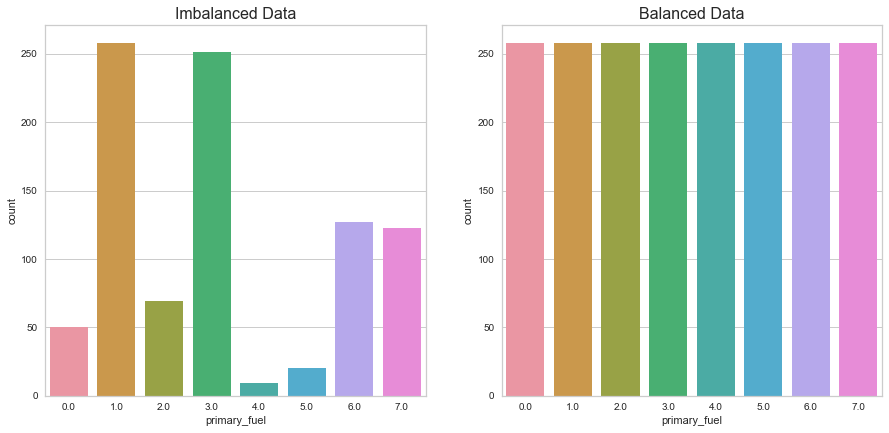

In [94]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=16)
plt.subplot(2,2,2)
sns.countplot(y_new['primary_fuel'])
plt.title("Balanced Data",fontsize=16)

Data has been balanced so now our model can predict every class with good accuracy.

In [95]:
#checking value counts of target column before balancing
df_gpp['primary_fuel'].value_counts()

1.0    258
3.0    251
6.0    127
7.0    123
2.0     69
0.0     50
5.0     20
4.0      9
Name: primary_fuel, dtype: int64

In [96]:
#target coulumn value counts after balancing the data
y_new.value_counts()

primary_fuel
0.0             258
1.0             258
2.0             258
3.0             258
4.0             258
5.0             258
6.0             258
7.0             258
dtype: int64

 In the above cell, we can see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification Machine Learning model does not get biased towards one category.

## Checking skewness:

In [97]:
x_new.skew()

gppd_idnr                    0.034845
capacity_mw                  2.838027
latitude                     0.049662
longitude                    1.575272
geolocation_source          -2.350912
state                        0.171397
Country                      0.000000
Capacity_as_per_fuel_type    5.157280
dtype: float64

We see that there is skewed data present, so we will be removing it now.

In [98]:
#removing skewness
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [99]:
#checking skewness after removal
x_new.skew()

gppd_idnr                    0.009996
capacity_mw                  0.024544
latitude                    -0.043090
longitude                    0.000000
geolocation_source          -2.307907
state                       -0.067100
Country                      7.031034
Capacity_as_per_fuel_type    0.064061
dtype: float64

Not entirely, but we removed skewness upto certain level.

## Feature Scaling:

In [100]:
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

## Training multiple models:

In [101]:
models_classification={
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "SupportVectorClassifier":SVC()
}

## Finding Best Random State

In [102]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    gbc_= GradientBoostingClassifier()
    gbc_.fit(x_train, y_train)
    pred_ada = gbc_.predict(x_test)
    acc=accuracy_score(y_test,pred_ada)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.9878934624697336 on Random_state  65


In [103]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=65)

## Finding the best model:

---------------------- AdaBoostClassifier --------------------------
Accuracy_Score 0.5690072639225182
SCORE 0.5690072639225182
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 15  0 41  0  0  0  1]
 [ 0  5  0 34  0  3  0  3]
 [ 0  0  0 24  0 28  0  0]
 [ 0  0  0 46  2  0  0  0]
 [ 0  0  0 11  0 30  0  6]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.75      0.26      0.39        57
         2.0       0.00      0.00      0.00        45
         3.0       0.15      0.46      0.23        52
         4.0       1.00      0.04      0.08        48
         5.0       0.49      0.64      0.56        47
         6.0       1.00      1.00      1.00        60
         7.0       0.84      1.00      0.91        51

    accuracy                           0.57       413
   macro avg       0.65      0.55      0.52       413
weighted avg       

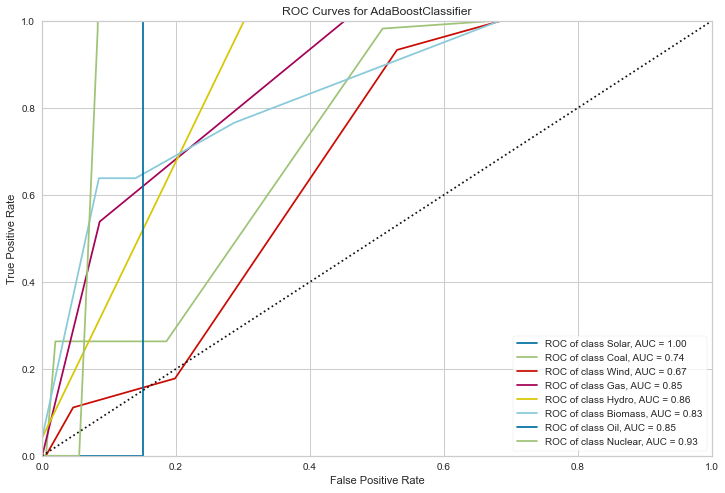

MODEL LEARNING CURVE


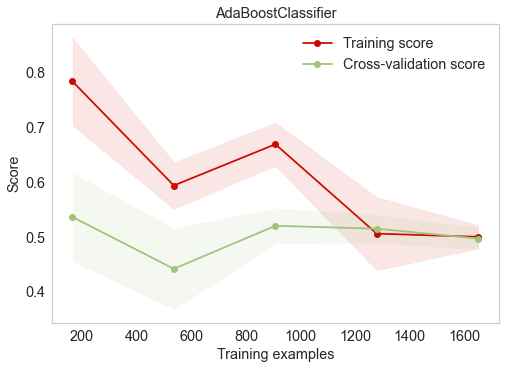

---------------------- GradientBoostingClassifier --------------------------
Accuracy_Score 0.9878934624697336
SCORE 0.9878934624697336
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  1 50  1  0  0  0]
 [ 0  0  0  1 46  1  0  0]
 [ 0  0  0  1  0 46  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        57
         2.0       0.98      1.00      0.99        45
         3.0       0.96      0.96      0.96        52
         4.0       0.98      0.96      0.97        48
         5.0       0.98      0.98      0.98        47
         6.0       1.00      1.00      1.00        60
         7.0       1.00      1.00      1.00        51

    accuracy                           0.99       413
   macro avg       0.99      0.99      0.99       413
weighted av

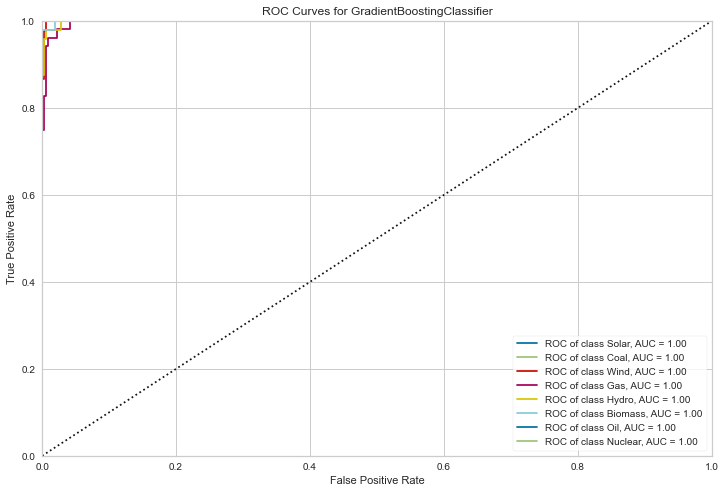

MODEL LEARNING CURVE


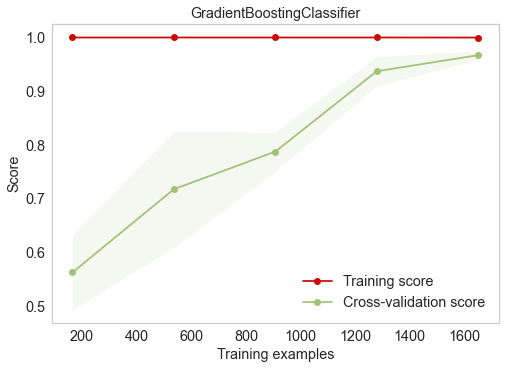

---------------------- RandomForestClassifier --------------------------
Accuracy_Score 0.9685230024213075
SCORE 0.9685230024213075
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 54  3  0  0  0  0  0]
 [ 0  1 41  0  1  2  0  0]
 [ 0  1  1 48  1  1  0  0]
 [ 0  0  0  1 47  0  0  0]
 [ 0  0  0  1  0 46  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.96      0.95      0.96        57
         2.0       0.91      0.91      0.91        45
         3.0       0.96      0.92      0.94        52
         4.0       0.96      0.98      0.97        48
         5.0       0.94      0.98      0.96        47
         6.0       1.00      1.00      1.00        60
         7.0       1.00      1.00      1.00        51

    accuracy                           0.97       413
   macro avg       0.97      0.97      0.97       413
weighted avg   

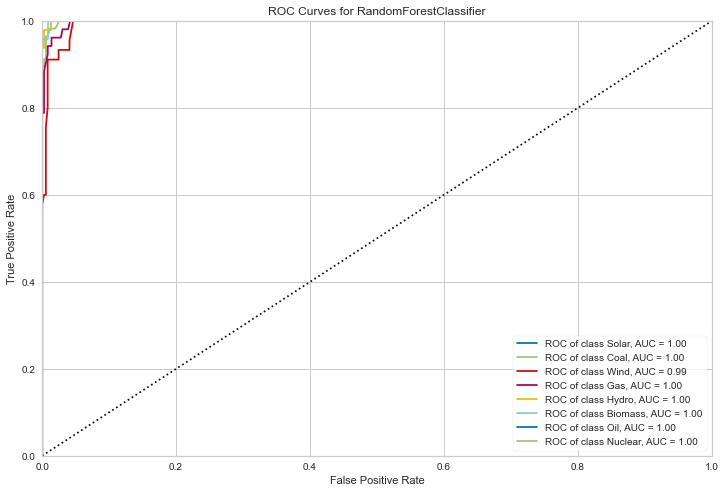

MODEL LEARNING CURVE


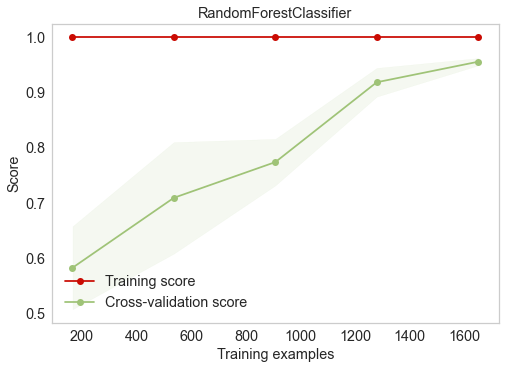

---------------------- DecisionTreeClassifier --------------------------
Accuracy_Score 0.9661016949152542
SCORE 0.9661016949152542
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0]
 [ 0  1 40  2  0  1  0  1]
 [ 0  1  0 47  4  0  0  0]
 [ 0  0  0  0 47  1  0  0]
 [ 0  0  0  1  1 45  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  1 50]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.97      1.00      0.98        57
         2.0       1.00      0.89      0.94        45
         3.0       0.94      0.90      0.92        52
         4.0       0.90      0.98      0.94        48
         5.0       0.96      0.96      0.96        47
         6.0       0.98      1.00      0.99        60
         7.0       0.98      0.98      0.98        51

    accuracy                           0.97       413
   macro avg       0.97      0.96      0.96       413
weighted avg   

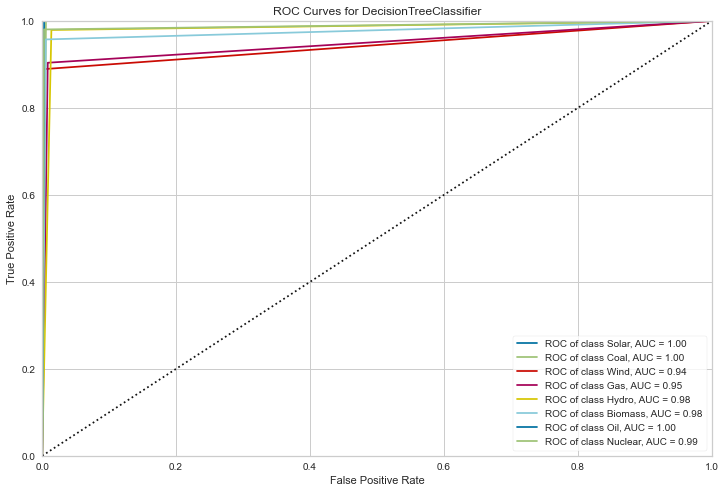

MODEL LEARNING CURVE


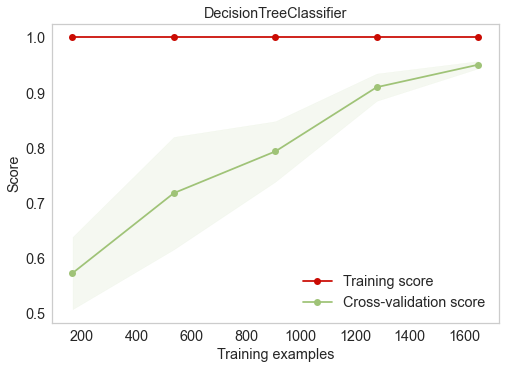

---------------------- SupportVectorClassifier --------------------------
Accuracy_Score 0.8765133171912833
SCORE 0.8765133171912833
Confusion metrics
[[53  0  0  0  0  0  0  0]
 [ 0 47  8  2  0  0  0  0]
 [ 0  4 32  4  3  2  0  0]
 [ 0  1  3 36  2 10  0  0]
 [ 0  0  3  0 45  0  0  0]
 [ 0  0  0  2  1 43  0  1]
 [ 0  0  0  0  0  0 59  1]
 [ 0  0  0  0  0  4  0 47]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.90      0.82      0.86        57
         2.0       0.70      0.71      0.70        45
         3.0       0.82      0.69      0.75        52
         4.0       0.88      0.94      0.91        48
         5.0       0.73      0.91      0.81        47
         6.0       1.00      0.98      0.99        60
         7.0       0.96      0.92      0.94        51

    accuracy                           0.88       413
   macro avg       0.87      0.87      0.87       413
weighted avg  

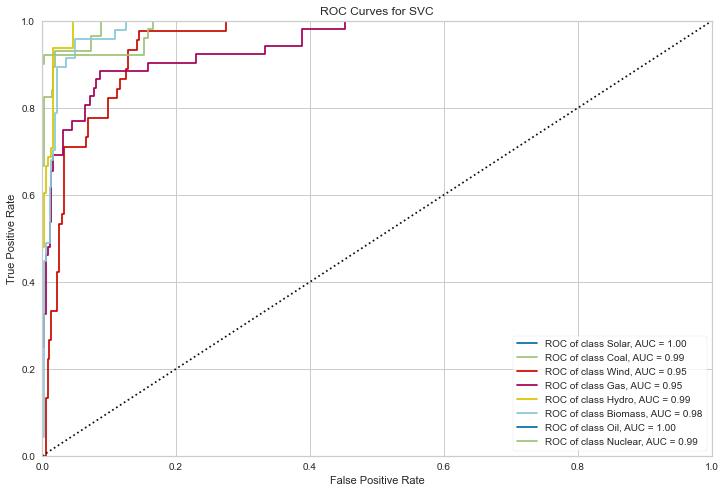

MODEL LEARNING CURVE


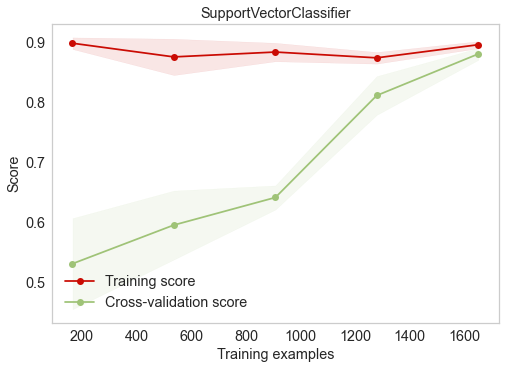

In [104]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models_classification.items():
    print("----------------------",name,"--------------------------")
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print("SCORE",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print(report)
    csv=cross_val_score(model,x_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,x_train,y_train,X_test=x_test,y_test=y_test,classes=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],micro=False,macro=False)

    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

In [105]:
#making a dataframe of the models
models_csv=pd.DataFrame({
    'Models':MODEL,
    "Accuracy Score":Score,
    'Cross_val_score':CVS
})

models_csv

,Models,Accuracy Score,Cross_val_score
0,AdaBoostClassifier,0.569007,49.660429
1,GradientBoostingClassifier,0.987893,96.657303
2,RandomForestClassifier,0.968523,95.494135
3,DecisionTreeClassifier,0.966102,94.574038
4,SupportVectorClassifier,0.876513,88.032276


## We will be selecting Gradient Boosting Classifier as it is giving us cross_val_Score of 0.96 and good metrics of  model.

## Hyperparameter tuning our best ML model:

In [106]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [107]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [108]:
param_class={
 'max_depth': [6,5,7],
 'criterion':['friedman_mse', 'squared_error', 'mse'],
 'subsample': [1,2,3],
 'verbose': [None,0,1,2]}

In [109]:
Grid_classifier=GridSearchCV(estimator=gbc,param_grid=param_class,cv=5)

In [110]:
Grid_classifier.fit(x_new,y_new)

      Iter       Train Loss   Remaining Time 
         1           1.5125            4.64s
         2           1.2178            6.12s
         3           1.0101            7.39s
         4           0.8537            7.73s
         5           0.7318            7.61s
         6           0.6309            7.61s
         7           0.5442            7.70s
         8           0.4722            7.80s
         9           0.4050            7.73s
        10           0.3488            7.58s
        20           0.0916            6.78s
        30           0.0325            5.97s
        40           0.0127            5.09s
        50           0.0054            4.24s
        60           0.0023            3.39s
        70           0.0010            2.56s
        80           0.0005            1.71s
        90           0.0002            0.86s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5132            4.64s
        

        82           0.0004            1.61s
        83           0.0004            1.52s
        84           0.0004            1.43s
        85           0.0003            1.34s
        86           0.0003            1.25s
        87           0.0003            1.16s
        88           0.0003            1.07s
        89           0.0003            0.98s
        90           0.0002            0.89s
        91           0.0002            0.80s
        92           0.0002            0.71s
        93           0.0002            0.62s
        94           0.0002            0.54s
        95           0.0002            0.45s
        96           0.0002            0.36s
        97           0.0001            0.27s
        98           0.0001            0.18s
        99           0.0001            0.09s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5132            4.64s
         2           1.2165            6.89s
         

        63           0.0018            3.24s
        64           0.0017            3.16s
        65           0.0016            3.06s
        66           0.0014            2.98s
        67           0.0013            2.90s
        68           0.0012            2.81s
        69           0.0011            2.72s
        70           0.0010            2.64s
        71           0.0009            2.55s
        72           0.0009            2.46s
        73           0.0008            2.37s
        74           0.0008            2.29s
        75           0.0007            2.20s
        76           0.0007            2.11s
        77           0.0006            2.02s
        78           0.0006            1.93s
        79           0.0005            1.84s
        80           0.0005            1.76s
        81           0.0005            1.67s
        82           0.0004            1.58s
        83           0.0004            1.49s
        84           0.0004            1.41s
        85

        44           0.0083            4.84s
        45           0.0076            4.77s
        46           0.0070            4.67s
        47           0.0064            4.58s
        48           0.0060            4.49s
        49           0.0056            4.41s
        50           0.0051            4.32s
        51           0.0047            4.23s
        52           0.0043            4.15s
        53           0.0040            4.06s
        54           0.0037            3.98s
        55           0.0034            3.90s
        56           0.0032            3.81s
        57           0.0029            3.73s
        58           0.0027            3.63s
        59           0.0025            3.55s
        60           0.0024            3.45s
        61           0.0022            3.36s
        62           0.0020            3.28s
        63           0.0019            3.20s
        64           0.0017            3.11s
        65           0.0016            3.02s
        66

        27           0.0770            5.41s
        28           0.0713            5.33s
        29           0.0661            5.22s
        30           0.0613            5.18s
        31           0.0569            5.11s
        32           0.0531            5.01s
        33           0.0488            4.97s
        34           0.0454            4.90s
        35           0.0422            4.80s
        36           0.0394            4.74s
        37           0.0368            4.67s
        38           0.0346            4.60s
        39           0.0327            4.55s
        40           0.0303            4.46s
        41           0.0280            4.39s
        42           0.0263            4.32s
        43           0.0245            4.24s
        44           0.0229            4.17s
        45           0.0215            4.11s
        46           0.0200            4.02s
        47           0.0187            3.95s
        48           0.0176            3.91s
        49

         8           0.5322            6.90s
         9           0.4738            6.76s
        10           0.4206            6.86s
        11           0.3797            6.92s
        12           0.3392            6.74s
        13           0.3013            6.68s
        14           0.2723            6.58s
        15           0.2440            6.48s
        16           0.2200            6.31s
        17           0.1997            6.27s
        18           0.1826            6.22s
        19           0.1657            6.08s
        20           0.1504            6.03s
        21           0.1370            6.00s
        22           0.1257            5.88s
        23           0.1150            5.83s
        24           0.1056            5.74s
        25           0.0968            5.62s
        26           0.0891            5.55s
        27           0.0823            5.53s
        28           0.0761            5.42s
        29           0.0703            5.43s
        30

        90           0.0016            0.76s
        91           0.0015            0.68s
        92           0.0014            0.61s
        93           0.0013            0.53s
        94           0.0013            0.46s
        95           0.0012            0.38s
        96           0.0012            0.30s
        97           0.0011            0.23s
        98           0.0011            0.15s
        99           0.0010            0.08s
       100           0.0009            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5651            4.64s
         2           1.2683            6.43s
         3           1.0668            7.09s
         4           0.9091            6.76s
         5           0.7831            7.04s
         6           0.6799            6.82s
         7           0.5919            6.75s
         8           0.5199            6.89s
         9           0.4580            6.76s
        10           0.4058            6.58s
        1

        10           0.2932            9.46s
        20           0.0652            8.60s
        30           0.0174            7.51s
        40           0.0058            6.41s
        50           0.0021            5.34s
        60           0.0008            4.25s
        70           0.0003            3.17s
        80           0.0001            2.12s
        90           0.0000            1.06s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4886            6.19s
         2           1.1701            7.66s
         3           0.9524            8.33s
         4           0.7869            8.80s
         5           0.6538            8.87s
         6           0.5497            9.02s
         7           0.4639            9.26s
         8           0.3936            9.28s
         9           0.3368            9.16s
        10           0.2872            9.28s
        20           0.0674            8.39s
        3

        51           0.0016            5.26s
        52           0.0014            5.16s
        53           0.0013            5.04s
        54           0.0011            4.94s
        55           0.0010            4.84s
        56           0.0009            4.73s
        57           0.0008            4.63s
        58           0.0007            4.51s
        59           0.0007            4.41s
        60           0.0006            4.29s
        61           0.0005            4.19s
        62           0.0005            4.08s
        63           0.0004            3.96s
        64           0.0004            3.86s
        65           0.0003            3.74s
        66           0.0003            3.64s
        67           0.0003            3.53s
        68           0.0003            3.42s
        69           0.0002            3.32s
        70           0.0002            3.21s
        71           0.0002            3.10s
        72           0.0002            3.00s
        73

        33           0.0122            7.25s
        34           0.0110            7.15s
        35           0.0097            7.02s
        36           0.0087            6.89s
        37           0.0079            6.79s
        38           0.0071            6.66s
        39           0.0064            6.56s
        40           0.0058            6.44s
        41           0.0051            6.35s
        42           0.0047            6.22s
        43           0.0042            6.10s
        44           0.0038            6.00s
        45           0.0034            5.87s
        46           0.0031            5.78s
        47           0.0028            5.66s
        48           0.0025            5.56s
        49           0.0023            5.45s
        50           0.0021            5.34s
        51           0.0019            5.22s
        52           0.0017            5.12s
        53           0.0015            5.03s
        54           0.0014            4.92s
        55

        50           0.0054            4.69s
        60           0.0023            3.83s
        70           0.0010            2.92s
        80           0.0005            1.98s
        90           0.0002            1.01s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5132            6.19s
         2           1.2165            7.66s
         3           1.0060            9.22s
         4           0.8456           10.22s
         5           0.7204           10.55s
         6           0.6210           10.30s
         7           0.5367           10.09s
         8           0.4642            9.91s
         9           0.4038            9.78s
        10           0.3485            9.50s
        20           0.0927            8.62s
        30           0.0301            7.59s
        40           0.0120            6.64s
        50           0.0050            5.42s
        60           0.0021            4.25s
        7

        97           0.0001            0.29s
        98           0.0001            0.19s
        99           0.0001            0.10s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5132            7.55s
         2           1.2165            9.81s
         3           1.0060           10.48s
         4           0.8456           10.92s
         5           0.7204           11.36s
         6           0.6210           11.59s
         7           0.5367           11.66s
         8           0.4642           11.52s
         9           0.4038           11.49s
        10           0.3485           11.35s
        11           0.3042           11.28s
        12           0.2630           11.09s
        13           0.2289           11.06s
        14           0.1996           10.95s
        15           0.1746           10.82s
        16           0.1534           10.72s
        17           0.1348           10.56s
        1

        79           0.0005            2.33s
        80           0.0005            2.22s
        81           0.0005            2.11s
        82           0.0004            2.00s
        83           0.0004            1.89s
        84           0.0004            1.78s
        85           0.0004            1.67s
        86           0.0003            1.56s
        87           0.0003            1.45s
        88           0.0003            1.34s
        89           0.0003            1.22s
        90           0.0003            1.11s
        91           0.0002            1.00s
        92           0.0002            0.88s
        93           0.0002            0.77s
        94           0.0002            0.66s
        95           0.0002            0.55s
        96           0.0002            0.44s
        97           0.0001            0.33s
        98           0.0001            0.22s
        99           0.0001            0.11s
       100           0.0001            0.00s
      Iter

        60           0.0023            3.74s
        61           0.0022            3.65s
        62           0.0020            3.55s
        63           0.0018            3.47s
        64           0.0017            3.36s
        65           0.0016            3.27s
        66           0.0015            3.18s
        67           0.0014            3.08s
        68           0.0013            2.99s
        69           0.0012            2.90s
        70           0.0011            2.80s
        71           0.0010            2.70s
        72           0.0010            2.62s
        73           0.0009            2.52s
        74           0.0008            2.42s
        75           0.0008            2.33s
        76           0.0007            2.23s
        77           0.0007            2.14s
        78           0.0006            2.05s
        79           0.0006            1.95s
        80           0.0005            1.86s
        81           0.0005            1.77s
        82

        41           0.0280            4.87s
        42           0.0263            4.80s
        43           0.0245            4.70s
        44           0.0229            4.61s
        45           0.0215            4.51s
        46           0.0200            4.40s
        47           0.0187            4.32s
        48           0.0176            4.25s
        49           0.0164            4.16s
        50           0.0155            4.06s
        51           0.0145            3.99s
        52           0.0136            3.90s
        53           0.0128            3.80s
        54           0.0121            3.72s
        55           0.0114            3.64s
        56           0.0108            3.54s
        57           0.0102            3.47s
        58           0.0095            3.38s
        59           0.0089            3.30s
        60           0.0083            3.22s
        61           0.0079            3.14s
        62           0.0074            3.06s
        63

        22           0.1257            5.77s
        23           0.1150            5.69s
        24           0.1056            5.63s
        25           0.0968            5.60s
        26           0.0891            5.54s
        27           0.0823            5.43s
        28           0.0761            5.36s
        29           0.0703            5.26s
        30           0.0647            5.16s
        31           0.0601            5.16s
        32           0.0553            5.08s
        33           0.0512            4.98s
        34           0.0470            4.88s
        35           0.0435            4.84s
        36           0.0407            4.75s
        37           0.0376            4.66s
        38           0.0350            4.56s
        39           0.0326            4.53s
        40           0.0303            4.44s
        41           0.0282            4.35s
        42           0.0261            4.31s
        43           0.0245            4.23s
        44

         3           1.0668            7.40s
         4           0.9093            7.20s
         5           0.7834            7.11s
         6           0.6807            7.53s
         7           0.5926            7.31s
         8           0.5229            7.05s
         9           0.4588            7.01s
        10           0.4066            6.96s
        11           0.3634            6.72s
        12           0.3250            6.70s
        13           0.2914            6.73s
        14           0.2628            6.64s
        15           0.2365            6.63s
        16           0.2152            6.55s
        17           0.1939            6.48s
        18           0.1768            6.46s
        19           0.1593            6.40s
        20           0.1437            6.25s
        21           0.1297            6.21s
        22           0.1184            6.07s
        23           0.1079            6.01s
        24           0.0992            5.99s
        25

         4           0.7869           11.32s
         5           0.6538           10.90s
         6           0.5497           10.45s
         7           0.4639           10.66s
         8           0.3936           10.66s
         9           0.3368           10.62s
        10           0.2872           10.38s
        20           0.0674            9.42s
        30           0.0168            8.13s
        40           0.0055            6.90s
        50           0.0019            5.78s
        60           0.0007            4.62s
        70           0.0003            3.45s
        80           0.0001            2.29s
        90           0.0000            1.14s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4838            4.64s
         2           1.1737            6.89s
         3           0.9583            8.83s
         4           0.7991            9.18s
         5           0.6744            9.73s
         

        67           0.0003            3.93s
        68           0.0003            3.80s
        69           0.0002            3.68s
        70           0.0002            3.56s
        71           0.0002            3.45s
        72           0.0002            3.32s
        73           0.0002            3.21s
        74           0.0001            3.10s
        75           0.0001            2.98s
        76           0.0001            2.86s
        77           0.0001            2.74s
        78           0.0001            2.62s
        79           0.0001            2.50s
        80           0.0001            2.38s
        81           0.0001            2.27s
        82           0.0001            2.15s
        83           0.0001            2.03s
        84           0.0001            1.91s
        85           0.0001            1.79s
        86           0.0000            1.67s
        87           0.0000            1.55s
        88           0.0000            1.43s
        89

        49           0.0023            6.03s
        50           0.0021            5.93s
        51           0.0019            5.82s
        52           0.0017            5.68s
        53           0.0015            5.58s
        54           0.0014            5.45s
        55           0.0013            5.34s
        56           0.0011            5.22s
        57           0.0010            5.10s
        58           0.0009            4.98s
        59           0.0008            4.86s
        60           0.0008            4.74s
        61           0.0007            4.61s
        62           0.0006            4.50s
        63           0.0006            4.39s
        64           0.0005            4.26s
        65           0.0005            4.14s
        66           0.0004            4.01s
        67           0.0004            3.90s
        68           0.0004            3.78s
        69           0.0003            3.66s
        70           0.0003            3.54s
        71

        10           0.3485            8.70s
        20           0.0926            7.37s
        30           0.0298            6.46s
        40           0.0114            5.52s
        50           0.0051            4.61s
        60           0.0022            3.65s
        70           0.0010            2.72s
        80           0.0005            1.82s
        90           0.0002            0.91s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5339            6.19s
         2           1.2309            6.89s
         3           1.0145            8.03s
         4           0.8533            8.41s
         5           0.7278            8.44s
         6           0.6242            8.40s
         7           0.5356            8.37s
         8           0.4629            8.42s
         9           0.4027            8.35s
        10           0.3480            8.14s
        20           0.0946            7.21s
        3

        11           0.3042            8.39s
        12           0.2630            8.18s
        13           0.2289            8.09s
        14           0.1995            8.01s
        15           0.1746            7.87s
        16           0.1534            7.71s
        17           0.1348            7.74s
        18           0.1184            7.66s
        19           0.1043            7.50s
        20           0.0926            7.46s
        21           0.0818            7.31s
        22           0.0727            7.23s
        23           0.0642            7.15s
        24           0.0568            7.02s
        25           0.0508            6.93s
        26           0.0453            6.90s
        27           0.0409            6.79s
        28           0.0367            6.70s
        29           0.0329            6.66s
        30           0.0298            6.53s
        31           0.0271            6.44s
        32           0.0245            6.38s
        33

        93           0.0002            0.68s
        94           0.0002            0.59s
        95           0.0002            0.49s
        96           0.0001            0.39s
        97           0.0001            0.29s
        98           0.0001            0.20s
        99           0.0001            0.10s
       100           0.0001            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.5099            6.19s
         2           1.2107            8.14s
         3           0.9984            8.91s
         4           0.8352            9.53s
         5           0.7032            9.22s
         6           0.5996            9.07s
         7           0.5141            9.06s
         8           0.4456            8.74s
         9           0.3843            8.47s
        10           0.3316            8.52s
        11           0.2883            8.43s
        12           0.2502            8.22s
        13           0.2182            8.21s
        1

        75           0.0008            2.37s
        76           0.0007            2.27s
        77           0.0007            2.17s
        78           0.0006            2.09s
        79           0.0006            1.99s
        80           0.0005            1.89s
        81           0.0005            1.80s
        82           0.0005            1.70s
        83           0.0004            1.61s
        84           0.0004            1.51s
        85           0.0004            1.42s
        86           0.0004            1.32s
        87           0.0003            1.23s
        88           0.0003            1.13s
        89           0.0003            1.04s
        90           0.0003            0.94s
        91           0.0003            0.85s
        92           0.0002            0.75s
        93           0.0002            0.66s
        94           0.0002            0.56s
        95           0.0002            0.47s
        96           0.0002            0.38s
        97

        57           0.0102            3.40s
        58           0.0095            3.33s
        59           0.0089            3.26s
        60           0.0083            3.19s
        61           0.0079            3.10s
        62           0.0074            3.05s
        63           0.0070            2.99s
        64           0.0067            2.90s
        65           0.0063            2.82s
        66           0.0059            2.74s
        67           0.0057            2.65s
        68           0.0054            2.57s
        69           0.0051            2.48s
        70           0.0048            2.40s
        71           0.0046            2.32s
        72           0.0044            2.24s
        73           0.0041            2.15s
        74           0.0039            2.08s
        75           0.0037            2.00s
        76           0.0035            1.93s
        77           0.0033            1.85s
        78           0.0031            1.77s
        79

        39           0.0326            5.29s
        40           0.0303            5.18s
        41           0.0282            5.06s
        42           0.0261            4.97s
        43           0.0245            4.85s
        44           0.0229            4.76s
        45           0.0216            4.65s
        46           0.0201            4.55s
        47           0.0190            4.44s
        48           0.0178            4.33s
        49           0.0166            4.23s
        50           0.0155            4.13s
        51           0.0145            4.04s
        52           0.0137            3.95s
        53           0.0128            3.88s
        54           0.0121            3.80s
        55           0.0114            3.69s
        56           0.0107            3.61s
        57           0.0100            3.51s
        58           0.0095            3.43s
        59           0.0089            3.33s
        60           0.0084            3.25s
        61

        20           0.1381            5.62s
        21           0.1258            5.57s
        22           0.1147            5.47s
        23           0.1046            5.43s
        24           0.0951            5.33s
        25           0.0869            5.24s
        26           0.0801            5.23s
        27           0.0742            5.14s
        28           0.0686            5.05s
        29           0.0630            5.01s
        30           0.0585            4.90s
        31           0.0543            4.85s
        32           0.0502            4.79s
        33           0.0467            4.70s
        34           0.0436            4.62s
        35           0.0407            4.59s
        36           0.0379            4.50s
        37           0.0353            4.42s
        38           0.0327            4.34s
        39           0.0305            4.27s
        40           0.0287            4.22s
        41           0.0270            4.13s
        42

         2           1.1737            8.42s
         3           0.9583            8.55s
         4           0.7991            9.09s
         5           0.6744            9.14s
         6           0.5739            9.00s
         7           0.4909            9.25s
         8           0.4211            9.26s
         9           0.3635            9.25s
        10           0.3157            9.08s
        11           0.2726            9.14s
        12           0.2376            8.97s
        13           0.2025            8.95s
        14           0.1742            8.84s
        15           0.1502            8.76s
        16           0.1289            8.69s
        17           0.1114            8.68s
        18           0.0966            8.62s
        19           0.0842            8.51s
        20           0.0733            8.43s
        21           0.0645            8.32s
        22           0.0560            8.29s
        23           0.0488            8.23s
        24

        85           0.0001            1.63s
        86           0.0001            1.52s
        87           0.0001            1.41s
        88           0.0001            1.30s
        89           0.0000            1.20s
        90           0.0000            1.09s
        91           0.0000            0.98s
        92           0.0000            0.87s
        93           0.0000            0.76s
        94           0.0000            0.65s
        95           0.0000            0.54s
        96           0.0000            0.43s
        97           0.0000            0.33s
        98           0.0000            0.22s
        99           0.0000            0.11s
       100           0.0000            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.4967            7.42s
         2           1.1841            8.33s
         3           0.9706            9.37s
         4           0.8083            9.69s
         5           0.6778           10.02s
         

        66           0.0004            3.66s
        67           0.0004            3.55s
        68           0.0004            3.44s
        69           0.0003            3.34s
        70           0.0003            3.23s
        71           0.0003            3.11s
        72           0.0002            3.01s
        73           0.0002            2.90s
        74           0.0002            2.79s
        75           0.0002            2.68s
        76           0.0002            2.57s
        77           0.0001            2.47s
        78           0.0001            2.36s
        79           0.0001            2.25s
        80           0.0001            2.14s
        81           0.0001            2.03s
        82           0.0001            1.93s
        83           0.0001            1.82s
        84           0.0001            1.71s
        85           0.0001            1.61s
        86           0.0001            1.50s
        87           0.0001            1.39s
        88

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'max_depth': [6, 5, 7], 'subsample': [1, 2, 3],
                         'verbose': [None, 0, 1, 2]})

In [111]:
Grid_classifier.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5, 'subsample': 1, 'verbose': 0}

In [112]:
Grid_classifier.best_score_

0.9786854415947719

## Final Model Learning Curve:

In [113]:
gbc=GradientBoostingClassifier(
 criterion= 'friedman_mse',
 max_depth= 5,
 subsample= 1,
 verbose= 0)

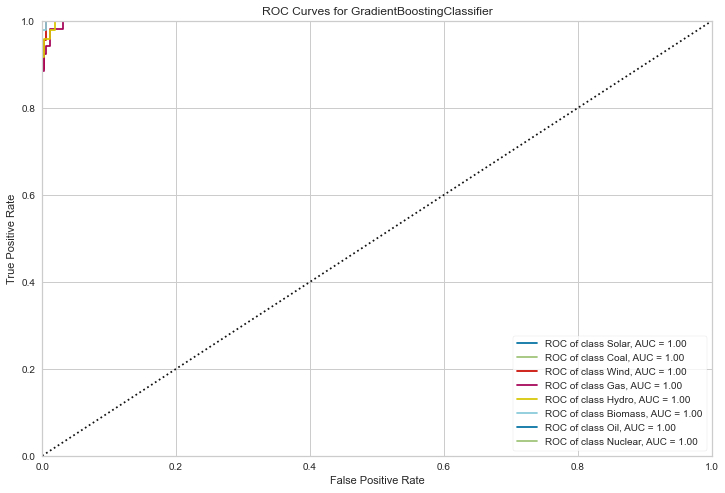

MODEL LEARNING CURVE


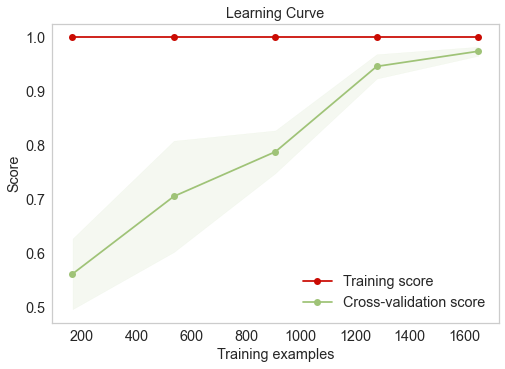

In [114]:
plt.figure(figsize=(12,8))
roc_auc(gbc,x_train,y_train,X_test=x_test,y_test=y_test,classes=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(gbc,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large')
plt.show()

## Final Model Metrics:

In [115]:
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,pred_gbc))
print("Confusion Matrics")
print(confusion_matrix(y_test,pred_gbc))
print("Classification Report")
print(classification_report(y_test,pred_gbc))

Accuracy_score 0.9854721549636803
Confusion Matrics
[[53  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0  2 49  1  0  0  0]
 [ 0  0  0  1 46  1  0  0]
 [ 0  0  0  1  0 46  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 51]]
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        57
         2.0       0.96      1.00      0.98        45
         3.0       0.96      0.94      0.95        52
         4.0       0.98      0.96      0.97        48
         5.0       0.98      0.98      0.98        47
         6.0       1.00      1.00      1.00        60
         7.0       1.00      1.00      1.00        51

    accuracy                           0.99       413
   macro avg       0.98      0.98      0.98       413
weighted avg       0.99      0.99      0.99       413



## The Accuracy score of final classification model is 98.54%

## Saving the model:

In [116]:
joblib.dump(Grid_classifier,"Classification_Model_GPP.obj")

['Classification_Model_GPP.obj']

## Loading the model:

In [117]:
model=joblib.load('Classification_Model_GPP.obj')

In [118]:
model.predict(x_test)

array([7., 6., 0., 4., 5., 6., 1., 6., 0., 0., 4., 5., 0., 4., 1., 6., 2.,
       6., 4., 4., 7., 7., 5., 1., 1., 1., 5., 3., 1., 6., 1., 4., 2., 3.,
       1., 3., 5., 7., 1., 3., 7., 1., 4., 1., 3., 3., 0., 5., 2., 5., 1.,
       4., 3., 4., 0., 6., 1., 1., 6., 0., 5., 0., 4., 0., 5., 1., 1., 4.,
       5., 1., 2., 6., 6., 3., 6., 6., 4., 0., 2., 2., 4., 1., 1., 7., 4.,
       7., 0., 4., 7., 6., 5., 6., 1., 4., 3., 1., 1., 2., 7., 2., 1., 1.,
       5., 0., 1., 6., 1., 7., 7., 2., 1., 7., 4., 7., 0., 6., 6., 1., 2.,
       0., 0., 2., 2., 2., 3., 3., 5., 1., 5., 3., 6., 5., 6., 5., 4., 2.,
       4., 3., 4., 1., 7., 3., 6., 6., 4., 1., 1., 2., 3., 1., 2., 4., 2.,
       7., 7., 3., 0., 0., 3., 0., 5., 4., 7., 0., 7., 7., 4., 1., 4., 5.,
       7., 0., 6., 2., 0., 3., 4., 7., 2., 0., 7., 6., 5., 1., 5., 7., 3.,
       6., 4., 2., 3., 2., 5., 6., 5., 6., 1., 3., 3., 1., 3., 4., 4., 2.,
       6., 1., 2., 3., 0., 0., 3., 0., 5., 7., 7., 3., 4., 2., 3., 4., 7.,
       4., 6., 2., 1., 0.

## Conclusion

1. In this model analysis, we build two models- (a) which can predict capacity_mw and (b) which can predict primary_fuel.

2. For the capacity_mw model, we did lot of EDA to understand the importnace of feature over target column.

3. There is longitude and latitude given in the dataset so with the help of it we extracted the city and state name and did EDA on them too.

4. We did feature engineering later where we added some columns like city and state and also added a column which shows for a particular fuel type how much capacity_mw was required.

5. We build a Regression model for the target column 'capacity_mw' and as RandomForestRegressor gave good accuracy and good metrics score so we chose it as our final model.

6. We did not removed outliers while building the regression model because all the columns were categorical and no continuous column was present.

7. For building the second model i.e., classification model, we used upsampling SMOTE as it doesn't paste the sample again and again but it does sampling synthetically.

8. Later we applied classifier algorithms and found that GradientBoostingClassifier was giving good metrics as compared to other classifiers so we proceeded with GradientBoostingClassifier to build our final classification model.

9. While building classification model, we removed outliers because there was some continous columns and we used zscore method to remove outliers.